# 1. MODULO

In [8]:
# Importa el módulo 'os' para interactuar con el sistema de archivos y rutas del sistema operativo
import os

# Importa 'pandas' como 'pd', una biblioteca potente para manipulación y análisis de datos mediante DataFrames
import pandas as pd

# Importa el módulo 'datetime' para trabajar con fechas y horas de manera eficiente
import datetime

# 2. Rutas Y variables
## 2.1. Capresoca

In [47]:
R_S4 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\S4\S4_consolidado_total.txt"
R_R4 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\R4\R4_consolidado_total.txt"
R_S5 = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\S5\S5 TXT\S5_consolidado.txt"
R_S1_AUTO = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\Automatico-S1\All-AUTO-S1.txt"
R_MS = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\MS\MS Validados\All_MS_VAL.TXT"
R_NS = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\NS\NS validado\all-NS-VAL.txt"
R_NS_Municipios = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Novedades municipios\all-NS-VAL.txt"

#R_Maestro_ADRES = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MS\All\Max\2025_Máxim.txt"

R_Salida = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca"
ano = 2025
Regimen = "EPS025"
R_Salida = fr"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\{ano} BDUA entradas y Salidas {Regimen}.TXT"
#Regimen = "EPSC25"

## 2.2. Home

R_S4 = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\S4\S4_consolidado_total.txt"
R_R4 = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\R4\R4_consolidado_total.txt"
R_S5 = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\S5\S5 TXT\S5_consolidado.txt"
R_S1_AUTO = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\Automatico-S1\All-AUTO-S1.txt"
R_MS = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\MS\MS Validados\All_MS_VAL.TXT"
R_NS = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\NS\NS validado\all-NS-VAL.txt"
R_NS_Municipios = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Novedades municipios\all-NS-VAL.txt"
R_Maestro_ADRES = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MS\MS_Unif_Maximo.txt"

ano = 2025
Regimen = "EPS025"
#Regimen = "EPSC25"

# 3. Dataframes

In [ ]:
# Leer el archivo .TXT con pandas
df_S4 = pd.read_csv(R_S4, sep=',', encoding='utf-8',dtype=str)
df_R4 = pd.read_csv(R_R4, sep=',', encoding='utf-8',dtype=str)
df_S5 = pd.read_csv(R_S5, sep=',', encoding='utf-8',dtype=str)
df_S1_AUTO = pd.read_csv(R_S1_AUTO, sep=',', encoding='ansi',dtype=str)
df_MS = pd.read_csv(R_MS, sep=',', encoding='ansi',dtype=str)
df_NS = pd.read_csv(R_NS, sep=',', encoding='ansi',dtype=str)
df_NS_Municipios = pd.read_csv(R_NS_Municipios, sep=',', encoding='ansi',dtype=str)
#df_Maestro_ADRES = pd.read_csv(R_Maestro_ADRES, sep=',', encoding='ansi',dtype=str)


## 3.1. Unificación de dataframes

In [11]:
# Verificar estado inicial
print("=== ESTADO INICIAL ===")
print(f"df_NS: {df_NS.shape[0]} registros")
print(f"df_NS_Municipios: {df_NS_Municipios.shape[0]} registros")
print(f"Total esperado: {df_NS.shape[0] + df_NS_Municipios.shape[0]} registros")

# Verificar que tengan las mismas columnas
print(f"\ndf_NS tiene {df_NS.shape[1]} columnas")
print(f"df_NS_Municipios tiene {df_NS_Municipios.shape[1]} columnas")

# Verificar si las columnas son exactamente las mismas
columnas_iguales = list(df_NS.columns) == list(df_NS_Municipios.columns)
print(f"¿Columnas idénticas?: {columnas_iguales}")

if not columnas_iguales:
    print("⚠️ ADVERTENCIA: Las columnas no son idénticas")
    print("Columnas en df_NS:", list(df_NS.columns))
    print("Columnas en df_NS_Municipios:", list(df_NS_Municipios.columns))
    
    # Mostrar diferencias
    cols_df_NS = set(df_NS.columns)
    cols_df_NS_Municipios = set(df_NS_Municipios.columns)
    
    if cols_df_NS != cols_df_NS_Municipios:
        print("Columnas solo en df_NS:", cols_df_NS - cols_df_NS_Municipios)
        print("Columnas solo en df_NS_Municipios:", cols_df_NS_Municipios - cols_df_NS)

# Concatenar los DataFrames
print("\n=== CONCATENANDO DATAFRAMES ===")
df_NS_unificado = pd.concat([df_NS, df_NS_Municipios], ignore_index=True)

# Verificar resultado
print("=== RESULTADO ===")
print(f"DataFrame unificado: {df_NS_unificado.shape[0]} registros")
print(f"Columnas en resultado: {df_NS_unificado.shape[1]}")

# Validación de integridad
registros_originales = df_NS.shape[0] + df_NS_Municipios.shape[0]
registros_resultado = df_NS_unificado.shape[0]

print(f"\n=== VALIDACIÓN ===")
print(f"Registros originales (suma): {registros_originales}")
print(f"Registros en resultado: {registros_resultado}")
print(f"Diferencia: {registros_resultado - registros_originales}")

if registros_originales == registros_resultado:
    print("✅ VALIDACIÓN EXITOSA: La suma de registros coincide")
else:
    print("❌ ERROR: La suma de registros NO coincide")
    print("Revisar si hay algún problema en la concatenación")

# Información adicional del DataFrame unificado
print(f"\n=== INFORMACIÓN ADICIONAL ===")
print(f"Índices van de 0 a {df_NS_unificado.index.max()}")
print(f"¿Hay valores nulos?: {df_NS_unificado.isnull().any().any()}")

# Opcional: Mostrar primeras y últimas filas para verificar
print("\nPrimeras 3 filas del resultado:")
print(df_NS_unificado.head(3))
print("\nÚltimas 3 filas del resultado:")
print(df_NS_unificado.tail(3))

=== ESTADO INICIAL ===
df_NS: 497676 registros
df_NS_Municipios: 40580 registros
Total esperado: 538256 registros

df_NS tiene 21 columnas
df_NS_Municipios tiene 21 columnas
¿Columnas idénticas?: True

=== CONCATENANDO DATAFRAMES ===
=== RESULTADO ===
DataFrame unificado: 538256 registros
Columnas en resultado: 21

=== VALIDACIÓN ===
Registros originales (suma): 538256
Registros en resultado: 538256
Diferencia: 0
✅ VALIDACIÓN EXITOSA: La suma de registros coincide

=== INFORMACIÓN ADICIONAL ===
Índices van de 0 a 538255
¿Hay valores nulos?: True

Primeras 3 filas del resultado:
         Nombre_Archivo NUM_SOLICITUD_NOVEDAD  ENT_ID TPS_IDN_ID  \
0  NSEPS02505012018.VAL                   105  EPS025         CC   
1  NSEPS02505012018.VAL                   140  EPS025         CC   
2  NSEPS02505012018.VAL                   413  EPS025         TI   

  HST_IDN_NUMERO_IDENTIFICACION AFL_PRIMER_APELLIDO AFL_SEGUNDO_APELLIDO  \
0                       9652978              TRIANA               

# 4. Limpieza de datos

## 4.1. df_S4
### 4.1.1. Año

In [12]:
# Convertir la columna FECHA_PROCESO a datetime y filtrar por año 2025
df_S4['FECHA_PROCESO'] = pd.to_datetime(df_S4['FECHA_PROCESO'], format='%d/%m/%Y')
df_S4 = df_S4[df_S4['FECHA_PROCESO'].dt.year == ano]

### 4.1.2. Unicos

In [13]:
# Verificar estado inicial
print("=== ESTADO INICIAL ===")
print(f"Total de registros: {len(df_S4)}")
print(f"Registros únicos por AFL_ID: {df_S4['AFL_ID'].nunique()}")
print(f"Registros duplicados: {len(df_S4) - df_S4['AFL_ID'].nunique()}")

# Verificar duplicados por AFL_ID
duplicados_inicial = df_S4[df_S4.duplicated(subset=['AFL_ID'], keep=False)]
print(f"Registros en grupos duplicados: {len(duplicados_inicial)}")

# Convertir FECHA_PROCESO a datetime si no está ya convertida
if df_S4['FECHA_PROCESO'].dtype == 'object':
    df_S4['FECHA_PROCESO'] = pd.to_datetime(df_S4['FECHA_PROCESO'], format='%d/%m/%Y')

# Convertir RESPUESTA a numérico para asegurar comparaciones correctas
df_S4['RESPUESTA'] = pd.to_numeric(df_S4['RESPUESTA'])

def limpiar_duplicados_s4(df):
    """
    Limpia duplicados según los criterios especificados:
    1. Si hay respuesta=1 y respuesta=0 para el mismo AFL_ID, mantener respuesta=1
    2. Si todos son respuesta=0, mantener el más reciente (fecha más nueva)
    3. Si todos son respuesta=1, mantener el más reciente (fecha más nueva)
    """
    
    # Ordenar por AFL_ID, RESPUESTA (descendente), y FECHA_PROCESO (descendente)
    df_sorted = df.sort_values(['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO'], 
                              ascending=[True, False, False])
    
    # Eliminar duplicados manteniendo el primer registro después del ordenamiento
    # Esto garantiza que:
    # - Si hay respuesta=1, se mantiene (por orden descendente de RESPUESTA)
    # - Si hay múltiples con la misma respuesta, se mantiene el más reciente
    df_clean = df_sorted.drop_duplicates(subset=['AFL_ID'], keep='first')
    
    return df_clean

# Aplicar la limpieza
df_S4_clean = limpiar_duplicados_s4(df_S4)

# Verificar estado final
print("\n=== ESTADO FINAL ===")
print(f"Total de registros: {len(df_S4_clean)}")
print(f"Registros únicos por AFL_ID: {df_S4_clean['AFL_ID'].nunique()}")
print(f"Registros eliminados: {len(df_S4) - len(df_S4_clean)}")

# Verificar si quedan duplicados
duplicados_final = df_S4_clean[df_S4_clean.duplicated(subset=['AFL_ID'], keep=False)]
print(f"Duplicados restantes: {len(duplicados_final)}")

if len(duplicados_final) > 0:
    print("⚠️  ADVERTENCIA: Aún existen duplicados!")
    print(duplicados_final[['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']].head(10))
else:
    print("✅ No hay duplicados restantes")

# Análisis detallado de los casos procesados
print("\n=== ANÁLISIS DE CASOS ===")

# Contar casos por tipo de respuesta
respuesta_counts = df_S4_clean['RESPUESTA'].value_counts().sort_index()
print("Distribución de respuestas en resultado final:")
for respuesta, count in respuesta_counts.items():
    print(f"  RESPUESTA {respuesta}: {count} registros")

# Verificar algunos casos específicos para validación manual
print("\n=== VALIDACIÓN DE ALGUNOS CASOS ===")
# Tomar algunos AFL_ID que tenían duplicados y mostrar cómo se resolvieron
if len(duplicados_inicial) > 0:
    sample_ids = duplicados_inicial['AFL_ID'].unique()[:5]
    
    for afl_id in sample_ids:
        print(f"\nAFL_ID: {afl_id}")
        casos_originales = df_S4[df_S4['AFL_ID'] == afl_id][['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']].sort_values('FECHA_PROCESO')
        caso_final = df_S4_clean[df_S4_clean['AFL_ID'] == afl_id][['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']]
        
        print("  Casos originales:")
        for _, row in casos_originales.iterrows():
            print(f"    RESPUESTA: {row['RESPUESTA']}, FECHA: {row['FECHA_PROCESO'].strftime('%d/%m/%Y')}")
        
        print("  Caso mantenido:")
        if len(caso_final) > 0:
            row = caso_final.iloc[0]
            print(f"    RESPUESTA: {row['RESPUESTA']}, FECHA: {row['FECHA_PROCESO'].strftime('%d/%m/%Y')}")

# Actualizar el DataFrame original
df_S4 = df_S4_clean.copy()

print(f"\n✅ Proceso completado. DataFrame limpio asignado a df_S4")

=== ESTADO INICIAL ===
Total de registros: 1930
Registros únicos por AFL_ID: 939
Registros duplicados: 991
Registros en grupos duplicados: 1513

=== ESTADO FINAL ===
Total de registros: 939
Registros únicos por AFL_ID: 939
Registros eliminados: 991
Duplicados restantes: 0
✅ No hay duplicados restantes

=== ANÁLISIS DE CASOS ===
Distribución de respuestas en resultado final:
  RESPUESTA 0: 365 registros
  RESPUESTA 1: 574 registros

=== VALIDACIÓN DE ALGUNOS CASOS ===

AFL_ID: 99086045
  Casos originales:
    RESPUESTA: 1, FECHA: 04/07/2025
    RESPUESTA: 1, FECHA: 04/07/2025
  Caso mantenido:
    RESPUESTA: 1, FECHA: 04/07/2025

AFL_ID: 68526067
  Casos originales:
    RESPUESTA: 0, FECHA: 21/03/2025
    RESPUESTA: 0, FECHA: 04/04/2025
    RESPUESTA: 0, FECHA: 11/04/2025
  Caso mantenido:
    RESPUESTA: 0, FECHA: 11/04/2025

AFL_ID: 115803942
  Casos originales:
    RESPUESTA: 0, FECHA: 21/03/2025
    RESPUESTA: 0, FECHA: 04/04/2025
    RESPUESTA: 0, FECHA: 11/04/2025
  Caso mantenido:

### 4.1.3. Aceptación Salidas

In [14]:
print(f"Total de registros Antes: {len(df_S4)}")
df_S4 = df_S4[df_S4['RESPUESTA'] == 1]
print(f"Total de registros: {len(df_S4)}")

Total de registros Antes: 939
Total de registros: 574


## 4.2 df_R4
### 4.2.1 año

In [15]:
# Convertir la columna FECHA_PROCESO a datetime y filtrar por año 2025
df_R4['FECHA_PROCESO'] = pd.to_datetime(df_R4['FECHA_PROCESO'], format='%d/%m/%Y')
df_R4 = df_R4[df_R4['FECHA_PROCESO'].dt.year == ano]

### 4.2.2. Unicos

In [16]:
# Verificar estado inicial
print("=== ESTADO INICIAL ===")
print(f"Total de registros: {len(df_R4)}")
print(f"Registros únicos por AFL_ID: {df_R4['AFL_ID'].nunique()}")
print(f"Registros duplicados: {len(df_R4) - df_R4['AFL_ID'].nunique()}")

# Verificar duplicados por AFL_ID
duplicados_inicial = df_R4[df_R4.duplicated(subset=['AFL_ID'], keep=False)]
print(f"Registros en grupos duplicados: {len(duplicados_inicial)}")

# Convertir FECHA_PROCESO a datetime si no está ya convertida
if df_R4['FECHA_PROCESO'].dtype == 'object':
    df_R4['FECHA_PROCESO'] = pd.to_datetime(df_R4['FECHA_PROCESO'], format='%d/%m/%Y')

# Convertir RESPUESTA a numérico para asegurar comparaciones correctas
df_R4['RESPUESTA'] = pd.to_numeric(df_R4['RESPUESTA'])

def limpiar_duplicados_s4(df):
    """
    Limpia duplicados según los criterios especificados:
    1. Si hay respuesta=1 y respuesta=0 para el mismo AFL_ID, mantener respuesta=1
    2. Si todos son respuesta=0, mantener el más reciente (fecha más nueva)
    3. Si todos son respuesta=1, mantener el más reciente (fecha más nueva)
    """
    
    # Ordenar por AFL_ID, RESPUESTA (descendente), y FECHA_PROCESO (descendente)
    df_sorted = df.sort_values(['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO'], 
                              ascending=[True, False, False])
    
    # Eliminar duplicados manteniendo el primer registro después del ordenamiento
    # Esto garantiza que:
    # - Si hay respuesta=1, se mantiene (por orden descendente de RESPUESTA)
    # - Si hay múltiples con la misma respuesta, se mantiene el más reciente
    df_clean = df_sorted.drop_duplicates(subset=['AFL_ID'], keep='first')
    
    return df_clean

# Aplicar la limpieza
df_R4_clean = limpiar_duplicados_s4(df_R4)

# Verificar estado final
print("\n=== ESTADO FINAL ===")
print(f"Total de registros: {len(df_R4_clean)}")
print(f"Registros únicos por AFL_ID: {df_R4_clean['AFL_ID'].nunique()}")
print(f"Registros eliminados: {len(df_R4) - len(df_R4_clean)}")

# Verificar si quedan duplicados
duplicados_final = df_R4_clean[df_R4_clean.duplicated(subset=['AFL_ID'], keep=False)]
print(f"Duplicados restantes: {len(duplicados_final)}")

if len(duplicados_final) > 0:
    print("⚠️  ADVERTENCIA: Aún existen duplicados!")
    print(duplicados_final[['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']].head(10))
else:
    print("✅ No hay duplicados restantes")

# Análisis detallado de los casos procesados
print("\n=== ANÁLISIS DE CASOS ===")

# Contar casos por tipo de respuesta
respuesta_counts = df_R4_clean['RESPUESTA'].value_counts().sort_index()
print("Distribución de respuestas en resultado final:")
for respuesta, count in respuesta_counts.items():
    print(f"  RESPUESTA {respuesta}: {count} registros")

# Verificar algunos casos específicos para validación manual
print("\n=== VALIDACIÓN DE ALGUNOS CASOS ===")
# Tomar algunos AFL_ID que tenían duplicados y mostrar cómo se resolvieron
if len(duplicados_inicial) > 0:
    sample_ids = duplicados_inicial['AFL_ID'].unique()[:5]
    
    for afl_id in sample_ids:
        print(f"\nAFL_ID: {afl_id}")
        casos_originales = df_R4[df_R4['AFL_ID'] == afl_id][['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']].sort_values('FECHA_PROCESO')
        caso_final = df_R4_clean[df_R4_clean['AFL_ID'] == afl_id][['AFL_ID', 'RESPUESTA', 'FECHA_PROCESO']]
        
        print("  Casos originales:")
        for _, row in casos_originales.iterrows():
            print(f"    RESPUESTA: {row['RESPUESTA']}, FECHA: {row['FECHA_PROCESO'].strftime('%d/%m/%Y')}")
        
        print("  Caso mantenido:")
        if len(caso_final) > 0:
            row = caso_final.iloc[0]
            print(f"    RESPUESTA: {row['RESPUESTA']}, FECHA: {row['FECHA_PROCESO'].strftime('%d/%m/%Y')}")

# Actualizar el DataFrame original
df_R4 = df_R4_clean.copy()

print(f"\n✅ Proceso completado. DataFrame limpio asignado a df_R4")

=== ESTADO INICIAL ===
Total de registros: 2434
Registros únicos por AFL_ID: 868
Registros duplicados: 1566
Registros en grupos duplicados: 2135

=== ESTADO FINAL ===
Total de registros: 868
Registros únicos por AFL_ID: 868
Registros eliminados: 1566
Duplicados restantes: 0
✅ No hay duplicados restantes

=== ANÁLISIS DE CASOS ===
Distribución de respuestas en resultado final:
  RESPUESTA 0: 566 registros
  RESPUESTA 1: 302 registros

=== VALIDACIÓN DE ALGUNOS CASOS ===

AFL_ID: 109888801
  Casos originales:
    RESPUESTA: 0, FECHA: 04/07/2025
    RESPUESTA: 0, FECHA: 11/07/2025
    RESPUESTA: 0, FECHA: 18/07/2025
    RESPUESTA: 0, FECHA: 25/07/2025
  Caso mantenido:
    RESPUESTA: 0, FECHA: 25/07/2025

AFL_ID: 121930157
  Casos originales:
    RESPUESTA: 0, FECHA: 07/02/2025
    RESPUESTA: 0, FECHA: 14/02/2025
    RESPUESTA: 0, FECHA: 21/02/2025
  Caso mantenido:
    RESPUESTA: 0, FECHA: 21/02/2025

AFL_ID: 119333900
  Casos originales:
    RESPUESTA: 0, FECHA: 07/02/2025
    RESPUESTA

### 4.2.3. Aceptación Salidas

In [42]:
print(f"Total de registros Antes: {len(df_R4)}")
df_R4 = df_R4[df_R4['RESPUESTA'] == 1]
print(f"Total de registros: {len(df_R4)}")

Total de registros Antes: 868
Total de registros: 302


## 4.3. df_S5
### 4.3.1 año

In [17]:
# Convertir la columna FECHA_PROCESO a datetime y filtrar por año
df_S5['FECHA_PROCESO'] = pd.to_datetime(df_S5['FECHA_PROCESO'], format='%d/%m/%Y')
df_S5 = df_S5[df_S5['FECHA_PROCESO'].dt.year == ano]

### 4.3.2. S5 Aceptados 

In [18]:
print(f"Antes de filtrado:\n {df_S5.shape}")
df_S5 = df_S5[df_S5['RESPUESTA'] == "1"]
print(f"Despues de filtrado:\n {df_S5.shape}")

Antes de filtrado:
 (2983, 12)
Despues de filtrado:
 (416, 12)


## 4.4. df_S1_AUTO
### 4.4.1. año

In [19]:
# Convertir la columna Fecha_Efectiva a datetime y filtrar por año
print(f"Antes de filtrado:\n {df_S1_AUTO.shape}")
df_S1_AUTO['Fecha_Efectiva'] = pd.to_datetime(df_S1_AUTO['Fecha_Efectiva'], format='%d/%m/%Y')
df_S1_AUTO = df_S1_AUTO[df_S1_AUTO['Fecha_Efectiva'].dt.year == ano]
print(f"Despues de filtrado:\n {df_S1_AUTO.shape}")

Antes de filtrado:
 (233795, 35)
Despues de filtrado:
 (21396, 35)


### 4.4.2. Unicos

In [20]:
print(f"Antes de filtrado:\n {df_S1_AUTO.shape}")
df_S1_AUTO = df_S1_AUTO[df_S1_AUTO['ENT_ID_ORIGEN'] != 'EPSC25']
print(f"Despues de filtrado:\n {df_S1_AUTO.shape}")

Antes de filtrado:
 (21396, 35)
Despues de filtrado:
 (832, 35)


### 4.2.3. Eliminación "AUTOMATICO-"

In [21]:
df_S1_AUTO['Nombre_Archivo'] = df_S1_AUTO['Nombre_Archivo'].str.replace('AUTOMATICOS-', '')

## 4.5. df_MS
### 4.5.1. año

In [22]:
# Convertir la columna CND_AFL_FECHA_INICIO a datetime y filtrar por año
print(f"Antes de filtrado:\n {df_MS.shape}")
df_MS['CND_AFL_FECHA_INICIO'] = pd.to_datetime(df_MS['CND_AFL_FECHA_INICIO'], format='%d/%m/%Y')
df_MS['Fecha_Proceso'] = pd.to_datetime(df_MS['Fecha_Proceso'], format='%d/%m/%Y')
df_MS = df_MS[df_MS['CND_AFL_FECHA_INICIO'].dt.year == ano]
print(f"Despues de filtrado:\n {df_MS.shape}")

Antes de filtrado:
 (19812, 23)
Despues de filtrado:
 (548, 23)


## 4.6. df_NS_unificado
### 4.6.1. año

In [23]:
# Convertir la columna Fecha_Proceso a datetime y filtrar por año
print(f"Antes de filtrado:\n {df_NS_unificado.shape}")
df_NS_unificado['Fecha_Proceso'] = pd.to_datetime(df_NS_unificado['Fecha_Proceso'], format='%d/%m/%Y')
df_NS_unificado = df_NS_unificado[df_NS_unificado['Fecha_Proceso'].dt.year == ano]
print(f"Despues de filtrado:\n {df_NS_unificado.shape}")

Antes de filtrado:
 (538256, 21)
Despues de filtrado:
 (30843, 21)


### 4.6.2. Unicos

In [24]:
print(f"Antes de filtrado:\n {df_NS_unificado.shape}")
# Usando | (OR) para combinar condiciones
df_NS_unificado = df_NS_unificado[
    (df_NS_unificado['NOVEDAD'] == 'N09') | 
    (df_NS_unificado['NOVEDAD'] == 'N14') | 
    (df_NS_unificado['NOVEDAD'] == 'N13') | 
    (df_NS_unificado['NOVEDAD'] == 'N31')
]
print(f"Despues de filtrado:\n {df_NS_unificado.shape}")

Antes de filtrado:
 (30843, 21)
Despues de filtrado:
 (1929, 21)


### 4.6.3. Categorias

In [25]:
# Crear la nueva columna 'PROCESO' en df_NS_unificado según el valor de 'NOVEDAD'
df_NS_unificado['PROCESO'] = df_NS_unificado['NOVEDAD'].apply(
    lambda x: 'SALIDA' if x in ['N09', 'N14', 'N13'] else ('ENTRADA' if x == 'N31' else '')
)

# Calcular el número de registros para cada categoría en la columna 'PROCESO'
counts = df_NS_unificado['PROCESO'].value_counts()

# Calcular el porcentaje para cada categoría
total_rows = df_NS_unificado.shape[0]
percentages = (counts / total_rows) * 100

# Crear un nuevo DataFrame para mostrar los resultados de forma clara
summary_df = pd.DataFrame({
    'Número de Registros': counts,
    'Porcentaje (%)': percentages
})

# Imprimir el DataFrame con el resumen
print(summary_df)

         Número de Registros  Porcentaje (%)
PROCESO                                     
SALIDA                  1709       88.595127
ENTRADA                  220       11.404873


In [26]:
# Calcular el número de registros para cada categoría en la columna 'NOVEDAD'
counts = df_NS_unificado['NOVEDAD'].value_counts()

# Calcular el porcentaje para cada categoría
total_rows = df_NS_unificado.shape[0]
percentages = (counts / total_rows) * 100

# Crear un nuevo DataFrame para mostrar los resultados de forma clara
summary_df = pd.DataFrame({
    'Número de Registros': counts,
    'Porcentaje (%)': percentages
})

# Imprimir el DataFrame con el resumen
print(summary_df)

         Número de Registros  Porcentaje (%)
NOVEDAD                                     
N14                      894       46.345257
N13                      415       21.513738
N09                      400       20.736133
N31                      220       11.404873


# 5. Dataframes Estadisticas

In [27]:
# Crear DataFrame vacío con las columnas especificadas
df_Estadisticas = pd.DataFrame(columns=[
    'FECHA_PROCESO', 
    'NOMBRE_ARCHIVO', 
    'AFL_ID', 
    'TPS_IDN_ID', 
    'HST_IDN_NUMERO_IDENTIFICACION', 
    'RESPUESTA', 
    'PROCESO'
])

# Verificar la creación
print("DataFrame creado:")
print(f"Forma: {df_Estadisticas.shape}")
print(f"Columnas: {list(df_Estadisticas.columns)}")
print(f"¿Está vacío?: {df_Estadisticas.empty}")

DataFrame creado:
Forma: (0, 7)
Columnas: ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'RESPUESTA', 'PROCESO']
¿Está vacío?: True


## 5.1. df_S4

In [28]:
# Verificar que las columnas existen en df_S4
columnas_requeridas = [
    'FECHA_PROCESO', 
    'NOMBRE_ARCHIVO', 
    'AFL_ID', 
    'TPS_IDN_ID', 
    'HST_IDN_NUMERO_IDENTIFICACION', 
    'RESPUESTA'
]

print("=== VERIFICACIÓN DE COLUMNAS ===")
columnas_faltantes = [col for col in columnas_requeridas if col not in df_S4.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_S4: {columnas_faltantes}")
    print(f"Columnas disponibles en df_S4: {list(df_S4.columns)}")
else:
    print("✅ Todas las columnas requeridas están disponibles")
    
    # Verificar el tipo de datos de FECHA_PROCESO
    print(f"\nTipo de datos de FECHA_PROCESO en df_S4: {df_S4['FECHA_PROCESO'].dtype}")
    
    # Crear df_Estadisticas manteniendo los tipos de datos originales
    df_Estadisticas = df_S4[columnas_requeridas].copy()
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_Estadisticas['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO a datetime...")
        df_Estadisticas['FECHA_PROCESO'] = pd.to_datetime(df_Estadisticas['FECHA_PROCESO'])
    
    # Agregar columna PROCESO vacía
    df_Estadisticas['PROCESO'] = ''
    
    print(f"\n=== RESULTADO ===")
    print(f"df_Estadisticas creado con {df_Estadisticas.shape[0]} registros y {df_Estadisticas.shape[1]} columnas")
    print(f"Columnas: {list(df_Estadisticas.columns)}")
    
    # Verificar tipos de datos en el resultado
    print(f"\n=== TIPOS DE DATOS ===")
    for col in df_Estadisticas.columns:
        print(f"{col}: {df_Estadisticas[col].dtype}")
    
    # Verificar que PROCESO está vacía
    valores_proceso = df_Estadisticas['PROCESO'].unique()
    print(f"\nValores únicos en PROCESO: {valores_proceso}")
    
    # Verificar formato de FECHA_PROCESO
    print(f"\nEjemplos de FECHA_PROCESO:")
    print(df_Estadisticas['FECHA_PROCESO'].head(3).values)
    
    print("\nPrimeras 3 filas:")
    print(df_Estadisticas.head(3))
    
    # Información adicional sobre fechas
    if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
        print(f"\n=== INFORMACIÓN DE FECHAS ===")
        print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
        print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
        print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== VERIFICACIÓN DE COLUMNAS ===
✅ Todas las columnas requeridas están disponibles

Tipo de datos de FECHA_PROCESO en df_S4: datetime64[ns]

=== RESULTADO ===
df_Estadisticas creado con 574 registros y 7 columnas
Columnas: ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'RESPUESTA', 'PROCESO']

=== TIPOS DE DATOS ===
FECHA_PROCESO: datetime64[ns]
NOMBRE_ARCHIVO: object
AFL_ID: object
TPS_IDN_ID: object
HST_IDN_NUMERO_IDENTIFICACION: object
RESPUESTA: int64
PROCESO: object

Valores únicos en PROCESO: ['']

Ejemplos de FECHA_PROCESO:
['2025-05-23T00:00:00.000000000' '2025-06-20T00:00:00.000000000'
 '2025-05-09T00:00:00.000000000']

Primeras 3 filas:
      FECHA_PROCESO        NOMBRE_ARCHIVO     AFL_ID TPS_IDN_ID  \
45168    2025-05-23  S4EPS02523052025.VAL  100144937         TI   
44941    2025-06-20  S4EPS02520062025.VAL  100279031         CC   
44095    2025-05-09  S4EPS02509052025.VAL  100532830         CC   

      HST_IDN_NUMERO_IDENTIFIC

## 5.2. df_R4

In [29]:
# Verificar que las columnas existen en df_R4
columnas_requeridas = [
    'FECHA_PROCESO', 
    'NOMBRE_ARCHIVO', 
    'AFL_ID', 
    'TPS_IDN_ID', 
    'HST_IDN_NUMERO_IDENTIFICACION', 
    'RESPUESTA'
]

print("=== VERIFICACIÓN DE COLUMNAS EN df_R4 ===")
columnas_faltantes = [col for col in columnas_requeridas if col not in df_R4.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_R4: {columnas_faltantes}")
    print(f"Columnas disponibles en df_R4: {list(df_R4.columns)}")
else:
    print("✅ Todas las columnas requeridas están disponibles en df_R4")
    
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # Verificar el tipo de datos de FECHA_PROCESO en df_R4
    print(f"Tipo de datos de FECHA_PROCESO en df_R4: {df_R4['FECHA_PROCESO'].dtype}")
    
    # Crear DataFrame temporal con datos de df_R4
    df_R4_temp = df_R4[columnas_requeridas].copy()
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime en df_R4_temp
    if df_R4_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_R4 a datetime...")
        df_R4_temp['FECHA_PROCESO'] = pd.to_datetime(df_R4_temp['FECHA_PROCESO'])
    
    # Agregar columna PROCESO para df_R4 (puedes cambiar 'R4' por el valor que necesites)
    df_R4_temp['PROCESO'] = 'R4'
    
    # Concatenar con df_Estadisticas existente
    df_Estadisticas = pd.concat([df_Estadisticas, df_R4_temp], ignore_index=True)
    
    print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_R4 ===")
    print(f"Registros de df_S4: {registros_previos}")
    print(f"Registros de df_R4: {df_R4_temp.shape[0]}")
    print(f"Total esperado: {registros_previos + df_R4_temp.shape[0]}")
    print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
    
    # Validar la concatenación
    if df_Estadisticas.shape[0] == registros_previos + df_R4_temp.shape[0]:
        print("✅ Concatenación exitosa - Sin pérdida de registros")
    else:
        print("❌ Problema en la concatenación - Revisar datos")
    
    # Verificar distribución por PROCESO
    print(f"\n=== DISTRIBUCIÓN POR PROCESO ===")
    distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
    print(distribucion_proceso)
    
    # Verificar tipos de datos finales
    print(f"\n=== TIPOS DE DATOS FINALES ===")
    for col in df_Estadisticas.columns:
        print(f"{col}: {df_Estadisticas[col].dtype}")
    
    # Verificar formato de FECHA_PROCESO
    print(f"\nEjemplos de FECHA_PROCESO después de concatenar:")
    print(df_Estadisticas['FECHA_PROCESO'].head(3).values)
    print(df_Estadisticas['FECHA_PROCESO'].tail(3).values)
    
    print("\nPrimeras 3 filas (df_S4):")
    print(df_Estadisticas.head(3))
    print("\nÚltimas 3 filas (df_R4):")
    print(df_Estadisticas.tail(3))
    
    # Información adicional sobre fechas
    if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
        print(f"\n=== INFORMACIÓN DE FECHAS CONSOLIDADA ===")
        print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
        print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
        print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== VERIFICACIÓN DE COLUMNAS EN df_R4 ===
✅ Todas las columnas requeridas están disponibles en df_R4

Registros actuales en df_Estadisticas: 574
Tipo de datos de FECHA_PROCESO en df_R4: datetime64[ns]

=== RESULTADO DESPUÉS DE AGREGAR df_R4 ===
Registros de df_S4: 574
Registros de df_R4: 868
Total esperado: 1442
Total actual en df_Estadisticas: 1442
✅ Concatenación exitosa - Sin pérdida de registros

=== DISTRIBUCIÓN POR PROCESO ===
PROCESO
R4    868
      574
Name: count, dtype: int64

=== TIPOS DE DATOS FINALES ===
FECHA_PROCESO: datetime64[ns]
NOMBRE_ARCHIVO: object
AFL_ID: object
TPS_IDN_ID: object
HST_IDN_NUMERO_IDENTIFICACION: object
RESPUESTA: int64
PROCESO: object

Ejemplos de FECHA_PROCESO después de concatenar:
['2025-05-23T00:00:00.000000000' '2025-06-20T00:00:00.000000000'
 '2025-05-09T00:00:00.000000000']
['2025-07-25T00:00:00.000000000' '2025-05-23T00:00:00.000000000'
 '2025-03-14T00:00:00.000000000']

Primeras 3 filas (df_S4):
  FECHA_PROCESO        NOMBRE_ARCHIVO     AF

## 5.3. df_S5

In [30]:
# Verificar la estructura de columnas en df_S5
print("=== ANÁLISIS DE COLUMNAS EN df_S5 ===")
print(f"Todas las columnas en df_S5: {list(df_S5.columns)}")

# Buscar columnas relacionadas con identificación
columnas_identificacion = [col for col in df_S5.columns if 'TPS_IDN_ID' in col or 'HST_IDN_NUMERO_IDENTIFICACION' in col]
print(f"Columnas de identificación encontradas: {columnas_identificacion}")

# Verificar qué columnas usar específicamente
columnas_requeridas_s5 = [
    'FECHA_PROCESO', 
    'NOMBRE_ARCHIVO', 
    'AFL_ID', 
    'TPS_IDN_ID_2',  # ESPECÍFICAMENTE la columna con _2
    'HST_IDN_NUMERO_IDENTIFICACION_2',  # ESPECÍFICAMENTE la columna con _2
    'RESPUESTA'
]

# Verificar que las columnas específicas existen
print("\n=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS ===")
columnas_faltantes = [col for col in columnas_requeridas_s5 if col not in df_S5.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_S5: {columnas_faltantes}")
    print(f"Columnas disponibles en df_S5: {list(df_S5.columns)}")
    
    # Sugerir alternativas si las columnas _2 no existen
    alternativas = []
    for col_faltante in columnas_faltantes:
        col_sin_2 = col_faltante.replace('_2', '')
        if col_sin_2 in df_S5.columns:
            alternativas.append((col_faltante, col_sin_2))
    
    if alternativas:
        print(f"💡 Alternativas encontradas: {alternativas}")
        print("¿Deseas usar las columnas sin '_2'?")
        
else:
    print("✅ Todas las columnas específicas están disponibles en df_S5")
    
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # SELECCIÓN EXPLÍCITA de las columnas correctas
    print(f"\n=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===")
    
    # Crear DataFrame temporal con SOLO las columnas específicas que necesitamos
    df_S5_temp = df_S5[columnas_requeridas_s5].copy()
    
    print(f"Columnas seleccionadas de df_S5: {list(df_S5_temp.columns)}")
    
    # Verificar que efectivamente tomamos las columnas correctas
    print(f"Verificación - TPS_IDN_ID_2 está en df_S5_temp: {'TPS_IDN_ID_2' in df_S5_temp.columns}")
    print(f"Verificación - HST_IDN_NUMERO_IDENTIFICACION_2 está en df_S5_temp: {'HST_IDN_NUMERO_IDENTIFICACION_2' in df_S5_temp.columns}")
    
    # Mapeo de columnas EXPLÍCITO
    mapeo_columnas = {
        'FECHA_PROCESO': 'FECHA_PROCESO',
        'NOMBRE_ARCHIVO': 'NOMBRE_ARCHIVO', 
        'AFL_ID': 'AFL_ID',
        'TPS_IDN_ID_2': 'TPS_IDN_ID',  # Mapear ESPECÍFICAMENTE _2 a la columna estándar
        'HST_IDN_NUMERO_IDENTIFICACION_2': 'HST_IDN_NUMERO_IDENTIFICACION',  # Mapear ESPECÍFICAMENTE _2
        'RESPUESTA': 'RESPUESTA'
    }
    
    # Renombrar columnas
    df_S5_temp = df_S5_temp.rename(columns=mapeo_columnas)
    
    print(f"Columnas después del renombrado: {list(df_S5_temp.columns)}")
    
    # Verificar tipos de datos
    print(f"Tipo de datos de FECHA_PROCESO en df_S5: {df_S5_temp['FECHA_PROCESO'].dtype}")
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_S5_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_S5 a datetime...")
        df_S5_temp['FECHA_PROCESO'] = pd.to_datetime(df_S5_temp['FECHA_PROCESO'])
    
    # Agregar columna PROCESO
    df_S5_temp['PROCESO'] = 'S5'
    
    # Verificar muestra de datos antes de concatenar
    print(f"\n=== MUESTRA DE DATOS DE df_S5 ANTES DE CONCATENAR ===")
    print("Primeras 3 filas de df_S5_temp:")
    print(df_S5_temp.head(3))
    
    # Verificar que las estructuras coinciden
    print(f"\nColumnas en df_Estadisticas: {list(df_Estadisticas.columns)}")
    print(f"Columnas en df_S5_temp: {list(df_S5_temp.columns)}")
    
    columnas_coinciden = list(df_Estadisticas.columns) == list(df_S5_temp.columns)
    print(f"¿Las estructuras de columnas coinciden?: {columnas_coinciden}")
    
    if not columnas_coinciden:
        print("❌ Las estructuras no coinciden - Revisar antes de concatenar")
    else:
        # Concatenar con df_Estadisticas existente
        df_Estadisticas = pd.concat([df_Estadisticas, df_S5_temp], ignore_index=True)
        
        print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_S5 ===")
        print(f"Registros previos: {registros_previos}")
        print(f"Registros de df_S5: {df_S5_temp.shape[0]}")
        print(f"Total esperado: {registros_previos + df_S5_temp.shape[0]}")
        print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
        
        # Validar la concatenación
        if df_Estadisticas.shape[0] == registros_previos + df_S5_temp.shape[0]:
            print("✅ Concatenación exitosa - Sin pérdida de registros")
        else:
            print("❌ Problema en la concatenación - Revisar datos")
        
        # Verificar distribución por PROCESO
        print(f"\n=== DISTRIBUCIÓN POR PROCESO ===")
        distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
        print(distribucion_proceso)
        
        print("\nÚltimas 3 filas (df_S5):")
        print(df_Estadisticas.tail(3))

=== ANÁLISIS DE COLUMNAS EN df_S5 ===
Todas las columnas en df_S5: ['AFL_ID', 'ENT_ID_SOLICITANTE', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'ENT_ID_SOLICITANTE2', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2', 'RESPUESTA', 'CAUSAL_RESPUESTA', 'FECHA_PROBABLE_TRASLADO', 'NOMBRE_ARCHIVO', 'FECHA_PROCESO']
Columnas de identificación encontradas: ['TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2']

=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS ===
✅ Todas las columnas específicas están disponibles en df_S5

Registros actuales en df_Estadisticas: 1442

=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===
Columnas seleccionadas de df_S5: ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2', 'RESPUESTA']
Verificación - TPS_IDN_ID_2 está en df_S5_temp: True
Verificación - HST_IDN_NUMERO_IDENTIFICACION_2 está en df_S5_temp: True
Columnas después del renombrado: ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_I

## 5.4. df_S1_AUTO

In [31]:
# Verificar la estructura de columnas en df_S1_AUTO
print("=== ANÁLISIS DE COLUMNAS EN df_S1_AUTO ===")
print(f"Todas las columnas en df_S1_AUTO: {list(df_S1_AUTO.columns)}")

# Buscar columnas relacionadas con identificación
columnas_identificacion = [col for col in df_S1_AUTO.columns if 'TPS_IDN_ID' in col or 'HST_IDN_NUMERO_IDENTIFICACION' in col]
print(f"Columnas de identificación encontradas: {columnas_identificacion}")

# Verificar qué columnas usar específicamente para df_S1_AUTO
columnas_requeridas_s1_auto = [
    'Fecha_Efectiva',  # Equivalente a FECHA_PROCESO
    'Nombre_Archivo',  # Equivalente a NOMBRE_ARCHIVO
    'TPS_IDN_ID_2',    # ESPECÍFICAMENTE la columna con _2
    'HST_IDN_NUMERO_IDENTIFICACION_2'  # ESPECÍFICAMENTE la columna con _2
]

# Verificar que las columnas específicas existen
print("\n=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_S1_AUTO ===")
columnas_faltantes = [col for col in columnas_requeridas_s1_auto if col not in df_S1_AUTO.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_S1_AUTO: {columnas_faltantes}")
    print(f"Columnas disponibles en df_S1_AUTO: {list(df_S1_AUTO.columns)}")
    
    # Sugerir alternativas si las columnas _2 no existen
    alternativas = []
    for col_faltante in columnas_faltantes:
        if '_2' in col_faltante:
            col_sin_2 = col_faltante.replace('_2', '')
            if col_sin_2 in df_S1_AUTO.columns:
                alternativas.append((col_faltante, col_sin_2))
    
    if alternativas:
        print(f"💡 Alternativas encontradas: {alternativas}")
        print("¿Deseas usar las columnas sin '_2'?")
        
else:
    print("✅ Todas las columnas específicas están disponibles en df_S1_AUTO")
    
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # SELECCIÓN EXPLÍCITA de las columnas correctas
    print(f"\n=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===")
    
    # Crear DataFrame temporal con SOLO las columnas específicas que necesitamos
    df_S1_AUTO_temp = df_S1_AUTO[columnas_requeridas_s1_auto].copy()
    
    print(f"Columnas seleccionadas de df_S1_AUTO: {list(df_S1_AUTO_temp.columns)}")
    
    # Verificar que efectivamente tomamos las columnas correctas
    print(f"Verificación - TPS_IDN_ID_2 está en df_S1_AUTO_temp: {'TPS_IDN_ID_2' in df_S1_AUTO_temp.columns}")
    print(f"Verificación - HST_IDN_NUMERO_IDENTIFICACION_2 está en df_S1_AUTO_temp: {'HST_IDN_NUMERO_IDENTIFICACION_2' in df_S1_AUTO_temp.columns}")
    
    # Mapeo de columnas EXPLÍCITO para df_S1_AUTO
    mapeo_columnas_s1_auto = {
        'Fecha_Efectiva': 'FECHA_PROCESO',
        'Nombre_Archivo': 'NOMBRE_ARCHIVO',
        'TPS_IDN_ID_2': 'TPS_IDN_ID',
        'HST_IDN_NUMERO_IDENTIFICACION_2': 'HST_IDN_NUMERO_IDENTIFICACION'
    }
    
    # Renombrar columnas existentes
    df_S1_AUTO_temp = df_S1_AUTO_temp.rename(columns=mapeo_columnas_s1_auto)
    
    print(f"Columnas después del renombrado: {list(df_S1_AUTO_temp.columns)}")
    
    # Agregar columnas faltantes con valores vacíos/predeterminados
    print(f"\n=== AGREGANDO COLUMNAS FALTANTES ===")
    
    # AFL_ID no existe en df_S1_AUTO, se deja vacío (string vacío)
    df_S1_AUTO_temp['AFL_ID'] = ''
    print("✅ Columna AFL_ID agregada con valores vacíos")
    
    # RESPUESTA no existe en df_S1_AUTO, se deja vacío (string vacío)
    df_S1_AUTO_temp['RESPUESTA'] = ''
    print("✅ Columna RESPUESTA agregada con valores vacíos")
    
    # PROCESO se llena con 'S1' para identificar estos registros
    df_S1_AUTO_temp['PROCESO'] = 'S1'
    print("✅ Columna PROCESO agregada con valor 'S1'")
    
    # Reordenar columnas para que coincidan exactamente con df_Estadisticas
    columnas_orden_correcto = [
        'FECHA_PROCESO', 
        'NOMBRE_ARCHIVO', 
        'AFL_ID', 
        'TPS_IDN_ID', 
        'HST_IDN_NUMERO_IDENTIFICACION', 
        'RESPUESTA', 
        'PROCESO'
    ]
    
    df_S1_AUTO_temp = df_S1_AUTO_temp[columnas_orden_correcto]
    
    print(f"Columnas después del reordenamiento: {list(df_S1_AUTO_temp.columns)}")
    
    # Verificar tipos de datos
    print(f"\n=== VERIFICACIÓN DE TIPOS DE DATOS ===")
    print(f"Tipo de datos de FECHA_PROCESO en df_S1_AUTO: {df_S1_AUTO_temp['FECHA_PROCESO'].dtype}")
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_S1_AUTO_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_S1_AUTO a datetime...")
        try:
            df_S1_AUTO_temp['FECHA_PROCESO'] = pd.to_datetime(df_S1_AUTO_temp['FECHA_PROCESO'])
            print("✅ Conversión exitosa")
        except Exception as e:
            print(f"❌ Error en conversión de fecha: {e}")
            print("Primeras fechas para diagnóstico:")
            print(df_S1_AUTO_temp['FECHA_PROCESO'].head())
    
    # Verificar muestra de datos antes de concatenar
    print(f"\n=== MUESTRA DE DATOS DE df_S1_AUTO ANTES DE CONCATENAR ===")
    print("Primeras 3 filas de df_S1_AUTO_temp:")
    print(df_S1_AUTO_temp.head(3))
    
    # Verificar que las estructuras coinciden exactamente
    print(f"\n=== VERIFICACIÓN DE ESTRUCTURA ===")
    print(f"Columnas en df_Estadisticas: {list(df_Estadisticas.columns)}")
    print(f"Columnas en df_S1_AUTO_temp: {list(df_S1_AUTO_temp.columns)}")
    
    columnas_coinciden = list(df_Estadisticas.columns) == list(df_S1_AUTO_temp.columns)
    print(f"¿Las estructuras de columnas coinciden?: {columnas_coinciden}")
    
    if not columnas_coinciden:
        print("❌ Las estructuras no coinciden - Revisar antes de concatenar")
        
        # Mostrar diferencias específicas
        cols_estadisticas = set(df_Estadisticas.columns)
        cols_s1_auto = set(df_S1_AUTO_temp.columns)
        
        cols_solo_estadisticas = cols_estadisticas - cols_s1_auto
        cols_solo_s1_auto = cols_s1_auto - cols_estadisticas
        
        if cols_solo_estadisticas:
            print(f"Columnas solo en df_Estadisticas: {cols_solo_estadisticas}")
        if cols_solo_s1_auto:
            print(f"Columnas solo en df_S1_AUTO_temp: {cols_solo_s1_auto}")
            
    else:
        print("✅ Las estructuras coinciden perfectamente")
        
        # Verificar tipos de datos compatibles
        print(f"\n=== VERIFICACIÓN DE COMPATIBILIDAD DE TIPOS ===")
        tipos_compatibles = True
        for col in df_Estadisticas.columns:
            tipo_estadisticas = df_Estadisticas[col].dtype
            tipo_s1_auto = df_S1_AUTO_temp[col].dtype
            
            if col == 'FECHA_PROCESO':
                # Para fechas, ambos deben ser datetime o compatibles
                if not (tipo_estadisticas.name.startswith('datetime') and tipo_s1_auto.name.startswith('datetime')):
                    print(f"⚠️ Tipos incompatibles en {col}: {tipo_estadisticas} vs {tipo_s1_auto}")
                    tipos_compatibles = False
            else:
                # Para otras columnas, verificar compatibilidad básica
                print(f"{col}: {tipo_estadisticas} vs {tipo_s1_auto}")
        
        if tipos_compatibles:
            print("✅ Tipos de datos compatibles")
        else:
            print("⚠️ Algunos tipos de datos pueden causar problemas")
        
        # Concatenar con df_Estadisticas existente
        print(f"\n=== CONCATENANDO DATAFRAMES ===")
        df_Estadisticas = pd.concat([df_Estadisticas, df_S1_AUTO_temp], ignore_index=True)
        
        print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_S1_AUTO ===")
        print(f"Registros previos: {registros_previos}")
        print(f"Registros de df_S1_AUTO: {df_S1_AUTO_temp.shape[0]}")
        print(f"Total esperado: {registros_previos + df_S1_AUTO_temp.shape[0]}")
        print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
        
        # Validar la concatenación
        if df_Estadisticas.shape[0] == registros_previos + df_S1_AUTO_temp.shape[0]:
            print("✅ Concatenación exitosa - Sin pérdida de registros")
        else:
            print("❌ Problema en la concatenación - Revisar datos")
        
        # Verificar distribución por PROCESO
        print(f"\n=== DISTRIBUCIÓN POR PROCESO ===")
        distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
        print(distribucion_proceso)
        
        # Verificar registros específicos de S1_AUTO
        print(f"\n=== VERIFICACIÓN ESPECÍFICA DE REGISTROS S1_AUTO ===")
        registros_s1_auto = df_Estadisticas[df_Estadisticas['PROCESO'] == 'S1_AUTO']
        print(f"Registros S1_AUTO en df_Estadisticas: {len(registros_s1_auto)}")
        
        # Verificar campos vacíos en registros S1_AUTO
        print(f"AFL_ID vacíos en S1_AUTO: {(registros_s1_auto['AFL_ID'] == '').sum()}")
        print(f"RESPUESTA vacíos en S1_AUTO: {(registros_s1_auto['RESPUESTA'] == '').sum()}")
        
        print("\nÚltimas 3 filas (df_S1_AUTO):")
        print(df_Estadisticas.tail(3))
        
        # Información adicional sobre fechas consolidada
        if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
            print(f"\n=== INFORMACIÓN DE FECHAS CONSOLIDADA ===")
            print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
            print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
            print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== ANÁLISIS DE COLUMNAS EN df_S1_AUTO ===
Todas las columnas en df_S1_AUTO: ['Nombre_Archivo', 'ENT_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'TPS_GNR_ID', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2', 'AFL_PRIMER_APELLIDO_2', 'AFL_SEGUNDO_APELLIDO_2', 'AFL_PRIMER_NOMBRE_2', 'AFL_SEGUNDO_NOMBRE_2', 'AFL_FECHA_NACIMIENTO_2', 'TPS_GNR_ID_2', 'MNC_ID', 'ZNS_ID', 'FECHA_AFILIACION_MOVILIDAD', 'TPS_GRP_PBL_ID', 'TPS_NVL_SSB_ID', 'TIPO_TRASLADO', 'CND_AFL_SBS_METODOLOGIA', 'CND_AFL_SBS_SUBGRUPO_SIV', 'CON_DISCAPACIDAD', 'TPS_IDN_CF_ID', 'HST_IDN_NUMERO_CF_IDENTIFICACION', 'TPS_PRN_ID', 'TPS_AFL_ID', 'TPS_MDL_SBS_ID', 'ENT_ID_ORIGEN', 'Fecha_Efectiva', 'Fecha_Proceso']
Columnas de identificación encontradas: ['TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'TPS_IDN_ID_2', 'HST_IDN_NUMERO_IDENTIFICACION_2']

=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_S1_AUTO ===


## 5.5. df_MS

In [32]:
# Verificar la estructura de columnas en df_MS
print("=== ANÁLISIS DE COLUMNAS EN df_MS ===")
print(f"Todas las columnas en df_MS: {list(df_MS.columns)}")

# Verificar qué columnas usar específicamente para df_MS
columnas_requeridas_ms = [
    'Fecha_Proceso',   # Equivalente a FECHA_PROCESO (pero con mayúscula diferente)
    'Nombre_Archivo',  # Equivalente a NOMBRE_ARCHIVO
    'TPS_IDN_ID',      # Ya tiene el nombre correcto
    'HST_IDN_NUMERO_IDENTIFICACION'  # Ya tiene el nombre correcto
]

# Verificar que las columnas específicas existen
print("\n=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_MS ===")
columnas_faltantes = [col for col in columnas_requeridas_ms if col not in df_MS.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_MS: {columnas_faltantes}")
    print(f"Columnas disponibles en df_MS: {list(df_MS.columns)}")
    
    # Buscar alternativas si hay problemas con mayúsculas/minúsculas
    alternativas = []
    for col_faltante in columnas_faltantes:
        # Buscar coincidencias ignorando mayúsculas/minúsculas
        col_alternativa = None
        for col_disponible in df_MS.columns:
            if col_faltante.lower() == col_disponible.lower():
                col_alternativa = col_disponible
                break
        
        if col_alternativa:
            alternativas.append((col_faltante, col_alternativa))
    
    if alternativas:
        print(f"💡 Alternativas encontradas (diferencias en mayúsculas/minúsculas): {alternativas}")
        
        # Actualizar columnas_requeridas_ms con las alternativas encontradas
        for col_original, col_alternativa in alternativas:
            idx = columnas_requeridas_ms.index(col_original)
            columnas_requeridas_ms[idx] = col_alternativa
        
        print(f"Columnas actualizadas: {columnas_requeridas_ms}")
        
else:
    print("✅ Todas las columnas específicas están disponibles en df_MS")

# Continuar solo si todas las columnas están disponibles
columnas_faltantes_final = [col for col in columnas_requeridas_ms if col not in df_MS.columns]

if columnas_faltantes_final:
    print(f"❌ No se pueden procesar los datos. Columnas faltantes: {columnas_faltantes_final}")
else:
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # SELECCIÓN EXPLÍCITA de las columnas correctas
    print(f"\n=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===")
    
    # Crear DataFrame temporal con SOLO las columnas específicas que necesitamos
    df_MS_temp = df_MS[columnas_requeridas_ms].copy()
    
    print(f"Columnas seleccionadas de df_MS: {list(df_MS_temp.columns)}")
    
    # Mapeo de columnas EXPLÍCITO para df_MS
    mapeo_columnas_ms = {}
    
    # Mapear según las columnas disponibles
    for col in df_MS_temp.columns:
        if col.lower() == 'fecha_proceso':
            mapeo_columnas_ms[col] = 'FECHA_PROCESO'
        elif col.lower() == 'nombre_archivo':
            mapeo_columnas_ms[col] = 'NOMBRE_ARCHIVO'
        elif col == 'TPS_IDN_ID':
            mapeo_columnas_ms[col] = 'TPS_IDN_ID'
        elif col == 'HST_IDN_NUMERO_IDENTIFICACION':
            mapeo_columnas_ms[col] = 'HST_IDN_NUMERO_IDENTIFICACION'
    
    print(f"Mapeo de columnas: {mapeo_columnas_ms}")
    
    # Renombrar columnas existentes
    df_MS_temp = df_MS_temp.rename(columns=mapeo_columnas_ms)
    
    print(f"Columnas después del renombrado: {list(df_MS_temp.columns)}")
    
    # Agregar columnas faltantes con valores vacíos/predeterminados
    print(f"\n=== AGREGANDO COLUMNAS FALTANTES ===")
    
    # AFL_ID no existe en df_MS, se deja vacío (string vacío)
    df_MS_temp['AFL_ID'] = ''
    print("✅ Columna AFL_ID agregada con valores vacíos")
    
    # RESPUESTA no existe en df_MS, se deja vacío (string vacío)
    df_MS_temp['RESPUESTA'] = ''
    print("✅ Columna RESPUESTA agregada con valores vacíos")
    
    # PROCESO se llena con 'MS' para identificar estos registros
    df_MS_temp['PROCESO'] = 'MS'
    print("✅ Columna PROCESO agregada con valor 'MS'")
    
    # Reordenar columnas para que coincidan exactamente con df_Estadisticas
    columnas_orden_correcto = [
        'FECHA_PROCESO', 
        'NOMBRE_ARCHIVO', 
        'AFL_ID', 
        'TPS_IDN_ID', 
        'HST_IDN_NUMERO_IDENTIFICACION', 
        'RESPUESTA', 
        'PROCESO'
    ]
    
    df_MS_temp = df_MS_temp[columnas_orden_correcto]
    
    print(f"Columnas después del reordenamiento: {list(df_MS_temp.columns)}")
    
    # Verificar tipos de datos
    print(f"\n=== VERIFICACIÓN DE TIPOS DE DATOS ===")
    print(f"Tipo de datos de FECHA_PROCESO en df_MS: {df_MS_temp['FECHA_PROCESO'].dtype}")
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_MS_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_MS a datetime...")
        try:
            df_MS_temp['FECHA_PROCESO'] = pd.to_datetime(df_MS_temp['FECHA_PROCESO'])
            print("✅ Conversión exitosa")
        except Exception as e:
            print(f"❌ Error en conversión de fecha: {e}")
            print("Primeras fechas para diagnóstico:")
            print(df_MS_temp['FECHA_PROCESO'].head())
    
    # Verificar muestra de datos antes de concatenar
    print(f"\n=== MUESTRA DE DATOS DE df_MS ANTES DE CONCATENAR ===")
    print("Primeras 3 filas de df_MS_temp:")
    print(df_MS_temp.head(3))
    
    # Verificar que las estructuras coinciden exactamente
    print(f"\n=== VERIFICACIÓN DE ESTRUCTURA ===")
    print(f"Columnas en df_Estadisticas: {list(df_Estadisticas.columns)}")
    print(f"Columnas en df_MS_temp: {list(df_MS_temp.columns)}")
    
    columnas_coinciden = list(df_Estadisticas.columns) == list(df_MS_temp.columns)
    print(f"¿Las estructuras de columnas coinciden?: {columnas_coinciden}")
    
    if not columnas_coinciden:
        print("❌ Las estructuras no coinciden - Revisar antes de concatenar")
        
        # Mostrar diferencias específicas
        cols_estadisticas = set(df_Estadisticas.columns)
        cols_ms = set(df_MS_temp.columns)
        
        cols_solo_estadisticas = cols_estadisticas - cols_ms
        cols_solo_ms = cols_ms - cols_estadisticas
        
        if cols_solo_estadisticas:
            print(f"Columnas solo en df_Estadisticas: {cols_solo_estadisticas}")
        if cols_solo_ms:
            print(f"Columnas solo en df_MS_temp: {cols_solo_ms}")
            
    else:
        print("✅ Las estructuras coinciden perfectamente")
        
        # Verificar tipos de datos compatibles
        print(f"\n=== VERIFICACIÓN DE COMPATIBILIDAD DE TIPOS ===")
        tipos_compatibles = True
        for col in df_Estadisticas.columns:
            tipo_estadisticas = df_Estadisticas[col].dtype
            tipo_ms = df_MS_temp[col].dtype
            
            if col == 'FECHA_PROCESO':
                # Para fechas, ambos deben ser datetime o compatibles
                if not (tipo_estadisticas.name.startswith('datetime') and tipo_ms.name.startswith('datetime')):
                    print(f"⚠️ Tipos incompatibles en {col}: {tipo_estadisticas} vs {tipo_ms}")
                    tipos_compatibles = False
            else:
                # Para otras columnas, verificar compatibilidad básica
                print(f"{col}: {tipo_estadisticas} vs {tipo_ms}")
        
        if tipos_compatibles:
            print("✅ Tipos de datos compatibles")
        else:
            print("⚠️ Algunos tipos de datos pueden causar problemas")
        
        # Concatenar con df_Estadisticas existente
        print(f"\n=== CONCATENANDO DATAFRAMES ===")
        df_Estadisticas = pd.concat([df_Estadisticas, df_MS_temp], ignore_index=True)
        
        print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_MS ===")
        print(f"Registros previos: {registros_previos}")
        print(f"Registros de df_MS: {df_MS_temp.shape[0]}")
        print(f"Total esperado: {registros_previos + df_MS_temp.shape[0]}")
        print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
        
        # Validar la concatenación
        if df_Estadisticas.shape[0] == registros_previos + df_MS_temp.shape[0]:
            print("✅ Concatenación exitosa - Sin pérdida de registros")
        else:
            print("❌ Problema en la concatenación - Revisar datos")
        
        # Verificar distribución por PROCESO
        print(f"\n=== DISTRIBUCIÓN POR PROCESO ===")
        distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
        print(distribucion_proceso)
        
        # Verificar registros específicos de MS
        print(f"\n=== VERIFICACIÓN ESPECÍFICA DE REGISTROS MS ===")
        registros_ms = df_Estadisticas[df_Estadisticas['PROCESO'] == 'MS']
        print(f"Registros MS en df_Estadisticas: {len(registros_ms)}")
        
        # Verificar campos vacíos en registros MS
        print(f"AFL_ID vacíos en MS: {(registros_ms['AFL_ID'] == '').sum()}")
        print(f"RESPUESTA vacíos en MS: {(registros_ms['RESPUESTA'] == '').sum()}")
        
        print("\nÚltimas 3 filas (df_MS):")
        print(df_Estadisticas.tail(3))
        
        # Información adicional sobre fechas consolidada
        if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
            print(f"\n=== INFORMACIÓN DE FECHAS CONSOLIDADA ===")
            print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
            print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
            print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== ANÁLISIS DE COLUMNAS EN df_MS ===
Todas las columnas en df_MS: ['Nombre_Archivo', 'ENT_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'TPS_GNR_ID', 'MNC_ID', 'ZNS_ID', 'CND_AFL_FECHA_INICIO', 'TPS_GRP_PBL_ID', 'TPS_NVL_SSB_ID', 'CND_AFL_SBS_METODOLOGIA', 'CND_AFL_SBS_SUBGRUPO_SIV', 'TPS_IDN_CF_ID', 'HST_IDN_NUMERO_CF_IDENTIFICACION', 'TPS_PRN_ID', 'TPS_AFL_ID', 'TP_ETNIA', 'Fecha_Proceso']

=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_MS ===
✅ Todas las columnas específicas están disponibles en df_MS

Registros actuales en df_Estadisticas: 2690

=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===
Columnas seleccionadas de df_MS: ['Fecha_Proceso', 'Nombre_Archivo', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION']
Mapeo de columnas: {'Fecha_Proceso': 'FECHA_PROCESO', 'Nombre_Archivo': 'NOMBRE_ARCHIVO', 'TPS_IDN_ID': 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION': 'HST_IDN_NUMERO_

## 5.6. df_NS_unificado

In [33]:
# Verificar la estructura de columnas en df_NS_unificado
print("=== ANÁLISIS DE COLUMNAS EN df_NS_unificado ===")
print(f"Todas las columnas en df_NS_unificado: {list(df_NS_unificado.columns)}")

# Verificar qué columnas usar específicamente para df_NS_unificado
columnas_requeridas_ns = [
    'Fecha_Proceso',   # Equivalente a FECHA_PROCESO
    'Nombre_Archivo',  # Equivalente a NOMBRE_ARCHIVO
    'TPS_IDN_ID',      # Ya tiene el nombre correcto
    'HST_IDN_NUMERO_IDENTIFICACION',  # Ya tiene el nombre correcto
    'PROCESO'          # Ya existe y tiene datos
]

# Verificar que las columnas específicas existen
print("\n=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_NS_unificado ===")
columnas_faltantes = [col for col in columnas_requeridas_ns if col not in df_NS_unificado.columns]

if columnas_faltantes:
    print(f"❌ Columnas faltantes en df_NS_unificado: {columnas_faltantes}")
    print(f"Columnas disponibles en df_NS_unificado: {list(df_NS_unificado.columns)}")
    
    # Buscar alternativas si hay problemas con mayúsculas/minúsculas
    alternativas = []
    for col_faltante in columnas_faltantes:
        # Buscar coincidencias ignorando mayúsculas/minúsculas
        col_alternativa = None
        for col_disponible in df_NS_unificado.columns:
            if col_faltante.lower() == col_disponible.lower():
                col_alternativa = col_disponible
                break
        
        if col_alternativa:
            alternativas.append((col_faltante, col_alternativa))
    
    if alternativas:
        print(f"💡 Alternativas encontradas (diferencias en mayúsculas/minúsculas): {alternativas}")
        
        # Actualizar columnas_requeridas_ns con las alternativas encontradas
        for col_original, col_alternativa in alternativas:
            idx = columnas_requeridas_ns.index(col_original)
            columnas_requeridas_ns[idx] = col_alternativa
        
        print(f"Columnas actualizadas: {columnas_requeridas_ns}")
        
else:
    print("✅ Todas las columnas específicas están disponibles en df_NS_unificado")

# Continuar solo si todas las columnas están disponibles
columnas_faltantes_final = [col for col in columnas_requeridas_ns if col not in df_NS_unificado.columns]

if columnas_faltantes_final:
    print(f"❌ No se pueden procesar los datos. Columnas faltantes: {columnas_faltantes_final}")
else:
    # Guardar el estado actual de df_Estadisticas
    registros_previos = df_Estadisticas.shape[0]
    print(f"\nRegistros actuales en df_Estadisticas: {registros_previos}")
    
    # SELECCIÓN EXPLÍCITA de las columnas correctas
    print(f"\n=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===")
    
    # Crear DataFrame temporal con SOLO las columnas específicas que necesitamos
    df_NS_temp = df_NS_unificado[columnas_requeridas_ns].copy()
    
    print(f"Columnas seleccionadas de df_NS_unificado: {list(df_NS_temp.columns)}")
    
    # Verificar valores únicos en la columna PROCESO existente
    print(f"\n=== ANÁLISIS DE COLUMNA PROCESO EXISTENTE ===")
    valores_proceso_existentes = df_NS_temp['PROCESO'].value_counts()
    print("Valores en PROCESO antes del procesamiento:")
    print(valores_proceso_existentes)
    
    # Mapeo de columnas EXPLÍCITO para df_NS_unificado
    mapeo_columnas_ns = {}
    
    # Mapear según las columnas disponibles
    for col in df_NS_temp.columns:
        if col.lower() == 'fecha_proceso':
            mapeo_columnas_ns[col] = 'FECHA_PROCESO'
        elif col.lower() == 'nombre_archivo':
            mapeo_columnas_ns[col] = 'NOMBRE_ARCHIVO'
        elif col == 'TPS_IDN_ID':
            mapeo_columnas_ns[col] = 'TPS_IDN_ID'
        elif col == 'HST_IDN_NUMERO_IDENTIFICACION':
            mapeo_columnas_ns[col] = 'HST_IDN_NUMERO_IDENTIFICACION'
        elif col == 'PROCESO':
            mapeo_columnas_ns[col] = 'PROCESO'  # Mantener la columna PROCESO
    
    print(f"Mapeo de columnas: {mapeo_columnas_ns}")
    
    # Renombrar columnas existentes
    df_NS_temp = df_NS_temp.rename(columns=mapeo_columnas_ns)
    
    print(f"Columnas después del renombrado: {list(df_NS_temp.columns)}")
    
    # Agregar columnas faltantes con valores vacíos
    print(f"\n=== AGREGANDO COLUMNAS FALTANTES ===")
    
    # AFL_ID no existe en df_NS_unificado, se deja vacío (string vacío)
    df_NS_temp['AFL_ID'] = ''
    print("✅ Columna AFL_ID agregada con valores vacíos")
    
    # RESPUESTA no existe en df_NS_unificado, se deja vacío (string vacío)
    df_NS_temp['RESPUESTA'] = ''
    print("✅ Columna RESPUESTA agregada con valores vacíos")
    
    # PROCESO ya existe, conservar los valores originales
    print("✅ Columna PROCESO ya existe - conservando valores originales")
    
    # Reordenar columnas para que coincidan exactamente con df_Estadisticas
    columnas_orden_correcto = [
        'FECHA_PROCESO', 
        'NOMBRE_ARCHIVO', 
        'AFL_ID', 
        'TPS_IDN_ID', 
        'HST_IDN_NUMERO_IDENTIFICACION', 
        'RESPUESTA', 
        'PROCESO'
    ]
    
    df_NS_temp = df_NS_temp[columnas_orden_correcto]
    
    print(f"Columnas después del reordenamiento: {list(df_NS_temp.columns)}")
    
    # Verificar tipos de datos
    print(f"\n=== VERIFICACIÓN DE TIPOS DE DATOS ===")
    print(f"Tipo de datos de FECHA_PROCESO en df_NS_unificado: {df_NS_temp['FECHA_PROCESO'].dtype}")
    
    # Asegurar que FECHA_PROCESO mantenga el formato datetime
    if df_NS_temp['FECHA_PROCESO'].dtype == 'object':
        print("⚠️ Convirtiendo FECHA_PROCESO de df_NS_unificado a datetime...")
        try:
            df_NS_temp['FECHA_PROCESO'] = pd.to_datetime(df_NS_temp['FECHA_PROCESO'])
            print("✅ Conversión exitosa")
        except Exception as e:
            print(f"❌ Error en conversión de fecha: {e}")
            print("Primeras fechas para diagnóstico:")
            print(df_NS_temp['FECHA_PROCESO'].head())
    
    # Verificar muestra de datos antes de concatenar
    print(f"\n=== MUESTRA DE DATOS DE df_NS_unificado ANTES DE CONCATENAR ===")
    print("Primeras 3 filas de df_NS_temp:")
    print(df_NS_temp.head(3))
    
    # Verificar distribución de valores PROCESO después del procesamiento
    print(f"\n=== DISTRIBUCIÓN FINAL DE PROCESO ===")
    valores_proceso_finales = df_NS_temp['PROCESO'].value_counts()
    print("Valores en PROCESO después del procesamiento:")
    print(valores_proceso_finales)
    
    # Verificar que las estructuras coinciden exactamente
    print(f"\n=== VERIFICACIÓN DE ESTRUCTURA ===")
    print(f"Columnas en df_Estadisticas: {list(df_Estadisticas.columns)}")
    print(f"Columnas en df_NS_temp: {list(df_NS_temp.columns)}")
    
    columnas_coinciden = list(df_Estadisticas.columns) == list(df_NS_temp.columns)
    print(f"¿Las estructuras de columnas coinciden?: {columnas_coinciden}")
    
    if not columnas_coinciden:
        print("❌ Las estructuras no coinciden - Revisar antes de concatenar")
        
        # Mostrar diferencias específicas
        cols_estadisticas = set(df_Estadisticas.columns)
        cols_ns = set(df_NS_temp.columns)
        
        cols_solo_estadisticas = cols_estadisticas - cols_ns
        cols_solo_ns = cols_ns - cols_estadisticas
        
        if cols_solo_estadisticas:
            print(f"Columnas solo en df_Estadisticas: {cols_solo_estadisticas}")
        if cols_solo_ns:
            print(f"Columnas solo en df_NS_temp: {cols_solo_ns}")
            
    else:
        print("✅ Las estructuras coinciden perfectamente")
        
        # Verificar tipos de datos compatibles
        print(f"\n=== VERIFICACIÓN DE COMPATIBILIDAD DE TIPOS ===")
        tipos_compatibles = True
        for col in df_Estadisticas.columns:
            tipo_estadisticas = df_Estadisticas[col].dtype
            tipo_ns = df_NS_temp[col].dtype
            
            if col == 'FECHA_PROCESO':
                # Para fechas, ambos deben ser datetime o compatibles
                if not (tipo_estadisticas.name.startswith('datetime') and tipo_ns.name.startswith('datetime')):
                    print(f"⚠️ Tipos incompatibles en {col}: {tipo_estadisticas} vs {tipo_ns}")
                    tipos_compatibles = False
            else:
                # Para otras columnas, verificar compatibilidad básica
                print(f"{col}: {tipo_estadisticas} vs {tipo_ns}")
        
        if tipos_compatibles:
            print("✅ Tipos de datos compatibles")
        else:
            print("⚠️ Algunos tipos de datos pueden causar problemas")
        
        # Concatenar con df_Estadisticas existente
        print(f"\n=== CONCATENANDO DATAFRAMES ===")
        df_Estadisticas = pd.concat([df_Estadisticas, df_NS_temp], ignore_index=True)
        
        print(f"\n=== RESULTADO DESPUÉS DE AGREGAR df_NS_unificado ===")
        print(f"Registros previos: {registros_previos}")
        print(f"Registros de df_NS_unificado: {df_NS_temp.shape[0]}")
        print(f"Total esperado: {registros_previos + df_NS_temp.shape[0]}")
        print(f"Total actual en df_Estadisticas: {df_Estadisticas.shape[0]}")
        
        # Validar la concatenación
        if df_Estadisticas.shape[0] == registros_previos + df_NS_temp.shape[0]:
            print("✅ Concatenación exitosa - Sin pérdida de registros")
        else:
            print("❌ Problema en la concatenación - Revisar datos")
        
        # Verificar distribución por PROCESO COMPLETA
        print(f"\n=== DISTRIBUCIÓN COMPLETA POR PROCESO ===")
        distribucion_proceso = df_Estadisticas['PROCESO'].value_counts()
        print(distribucion_proceso)
        
        # Verificar registros específicos de NS
        print(f"\n=== VERIFICACIÓN ESPECÍFICA DE REGISTROS NS ===")
        registros_ns = df_Estadisticas[df_Estadisticas['PROCESO'].isin(['ENTRADA', 'SALIDA'])]
        print(f"Registros NS (ENTRADA/SALIDA) en df_Estadisticas: {len(registros_ns)}")
        
        if len(registros_ns) > 0:
            distribucion_ns = registros_ns['PROCESO'].value_counts()
            print("Distribución específica de registros NS:")
            print(distribucion_ns)
        
        # Verificar campos vacíos en registros NS
        print(f"AFL_ID vacíos en registros NS: {(registros_ns['AFL_ID'] == '').sum()}")
        print(f"RESPUESTA vacíos en registros NS: {(registros_ns['RESPUESTA'] == '').sum()}")
        
        print("\nÚltimas 3 filas (df_NS_unificado):")
        print(df_Estadisticas.tail(3))
        
        # Información adicional sobre fechas consolidada
        if df_Estadisticas['FECHA_PROCESO'].dtype.name.startswith('datetime'):
            print(f"\n=== INFORMACIÓN DE FECHAS CONSOLIDADA ===")
            print(f"Fecha mínima: {df_Estadisticas['FECHA_PROCESO'].min()}")
            print(f"Fecha máxima: {df_Estadisticas['FECHA_PROCESO'].max()}")
            print(f"Rango de fechas: {df_Estadisticas['FECHA_PROCESO'].nunique()} fechas únicas")

=== ANÁLISIS DE COLUMNAS EN df_NS_unificado ===
Todas las columnas en df_NS_unificado: ['Nombre_Archivo', 'NUM_SOLICITUD_NOVEDAD', 'ENT_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO', 'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE', 'AFL_FECHA_NACIMIENTO', 'MNC_ID', 'NOVEDAD', 'FECHA_NOVEDAD', 'COD_1_NOVEDAD', 'COD_2_NOVEDAD', 'COD_3_NOVEDAD', 'COD_4_NOVEDAD', 'COD_5_NOVEDAD', 'COD_6_NOVEDAD', 'COD_7_NOVEDAD', 'Fecha_Proceso', 'PROCESO']

=== VERIFICACIÓN DE COLUMNAS ESPECÍFICAS EN df_NS_unificado ===
✅ Todas las columnas específicas están disponibles en df_NS_unificado

Registros actuales en df_Estadisticas: 3238

=== SELECCIÓN EXPLÍCITA DE COLUMNAS ===
Columnas seleccionadas de df_NS_unificado: ['Fecha_Proceso', 'Nombre_Archivo', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'PROCESO']

=== ANÁLISIS DE COLUMNA PROCESO EXISTENTE ===
Valores en PROCESO antes del procesamiento:
PROCESO
SALIDA     1709
ENTRADA     220
Name: count, dtype: int6

# 6. Categorización Salidas y entradas

In [34]:
# Análisis inicial del estado de la columna PROCESO
print("=== ANÁLISIS INICIAL DE LA COLUMNA PROCESO ===")
print(f"Total de registros en df_Estadisticas: {len(df_Estadisticas)}")

# Contar valores actuales en PROCESO
proceso_inicial = df_Estadisticas['PROCESO'].value_counts(dropna=False)
print("\nDistribución inicial de PROCESO:")
print(proceso_inicial)

# Análisis de los primeros dos caracteres de NOMBRE_ARCHIVO
print("\n=== ANÁLISIS DE NOMBRE_ARCHIVO ===")

# Extraer los primeros 2 caracteres para todos los registros y crear la columna Tipo_Archivo
df_Estadisticas['Tipo_Archivo'] = df_Estadisticas['NOMBRE_ARCHIVO'].str[:2]

print("✅ Columna 'Tipo_Archivo' creada con los primeros 2 caracteres de NOMBRE_ARCHIVO")

# Contar frecuencia de los primeros 2 caracteres
tipo_archivo_freq = df_Estadisticas['Tipo_Archivo'].value_counts(dropna=False)
print("Frecuencia de tipos de archivo:")
print(tipo_archivo_freq)

# Definir criterios de categorización
criterios_salida = ['R4', 'S4']
criterios_entrada = ['S1', 'S5', 'MS']

print(f"\n=== APLICANDO CRITERIOS DE CATEGORIZACIÓN A TODOS LOS REGISTROS ===")
print(f"Criterios para SALIDA: {criterios_salida}")
print(f"Criterios para ENTRADA: {criterios_entrada}")

# Crear una copia para trabajar
df_trabajo = df_Estadisticas.copy()

# APLICAR LA LÓGICA A TODOS LOS REGISTROS (no solo vacíos)
registros_procesados = 0
registros_salida = 0
registros_entrada = 0
registros_sin_criterio = 0

# Procesar TODOS los registros según los primeros 2 caracteres (usando Tipo_Archivo)
for idx in df_trabajo.index:
    tipo_archivo = df_trabajo.loc[idx, 'Tipo_Archivo']
    
    if tipo_archivo in criterios_salida:
        df_trabajo.loc[idx, 'PROCESO'] = 'SALIDA'
        registros_procesados += 1
        registros_salida += 1
    elif tipo_archivo in criterios_entrada:
        df_trabajo.loc[idx, 'PROCESO'] = 'ENTRADA'
        registros_procesados += 1
        registros_entrada += 1
    else:
        # Mantener el valor original si no cumple criterios
        registros_sin_criterio += 1

print(f"\nRegistros procesados: {registros_procesados}")
print(f"  - Asignados a SALIDA: {registros_salida}")
print(f"  - Asignados a ENTRADA: {registros_entrada}")
print(f"  - Sin criterio definido (mantienen valor original): {registros_sin_criterio}")

# Identificar casos que no se ajustan a los criterios
casos_sin_criterio = df_trabajo[~df_trabajo['Tipo_Archivo'].isin(criterios_salida + criterios_entrada)]

if len(casos_sin_criterio) > 0:
    print(f"\n⚠️ CASOS QUE NO SE AJUSTAN A LOS CRITERIOS: {len(casos_sin_criterio)}")
    tipos_sin_criterio = casos_sin_criterio['Tipo_Archivo'].value_counts(dropna=False)
    print("Tipos de archivo sin criterio definido:")
    print(tipos_sin_criterio)
    
    print("\nValores actuales de PROCESO en registros sin criterio:")
    proceso_sin_criterio = casos_sin_criterio['PROCESO'].value_counts(dropna=False)
    print(proceso_sin_criterio)
    
    print("\nEjemplos de registros sin criterio:")
    print(casos_sin_criterio[['NOMBRE_ARCHIVO', 'Tipo_Archivo', 'PROCESO']].head(5))
else:
    print("\n✅ Todos los registros se ajustan a los criterios definidos")

# Actualizar el DataFrame original
df_Estadisticas = df_trabajo.copy()

# Análisis final después de la categorización
print(f"\n=== ANÁLISIS FINAL DESPUÉS DE LA CATEGORIZACIÓN ===")

# Distribución final de PROCESO
proceso_final = df_Estadisticas['PROCESO'].value_counts(dropna=False)
print("Distribución final de PROCESO:")
print(proceso_final)

# Distribución final de Tipo_Archivo
print("\nDistribución final de Tipo_Archivo:")
tipo_archivo_final = df_Estadisticas['Tipo_Archivo'].value_counts(dropna=False)
print(tipo_archivo_final)

# Calcular porcentajes por PROCESO
total_registros = len(df_Estadisticas)
print(f"\nPorcentajes por categoría PROCESO:")
for categoria, cantidad in proceso_final.items():
    porcentaje = (cantidad / total_registros) * 100
    print(f"  {categoria}: {cantidad} registros ({porcentaje:.2f}%)")

# Calcular porcentajes por Tipo_Archivo
print(f"\nPorcentajes por Tipo_Archivo:")
for tipo, cantidad in tipo_archivo_final.items():
    porcentaje = (cantidad / total_registros) * 100
    print(f"  {tipo}: {cantidad} registros ({porcentaje:.2f}%)")

# Verificación cruzada: comprobar la lógica aplicada
print(f"\n=== VERIFICACIÓN CRUZADA ===")
for criterio in criterios_salida:
    # Registros que tienen este criterio
    registros_con_criterio = df_Estadisticas[df_Estadisticas['Tipo_Archivo'] == criterio]
    total_criterio = len(registros_con_criterio)
    
    # Registros que fueron categorizados correctamente como SALIDA
    categorizados_salida = len(registros_con_criterio[registros_con_criterio['PROCESO'] == 'SALIDA'])
    
    print(f"Registros con Tipo_Archivo '{criterio}': {total_criterio} | Categorizados como SALIDA: {categorizados_salida}")
    
    if total_criterio != categorizados_salida:
        print(f"  ⚠️ {total_criterio - categorizados_salida} registros con '{criterio}' NO fueron categorizados como SALIDA")

for criterio in criterios_entrada:
    # Registros que tienen este criterio
    registros_con_criterio = df_Estadisticas[df_Estadisticas['Tipo_Archivo'] == criterio]
    total_criterio = len(registros_con_criterio)
    
    # Registros que fueron categorizados correctamente como ENTRADA
    categorizados_entrada = len(registros_con_criterio[registros_con_criterio['PROCESO'] == 'ENTRADA'])
    
    print(f"Registros con Tipo_Archivo '{criterio}': {total_criterio} | Categorizados como ENTRADA: {categorizados_entrada}")
    
    if total_criterio != categorizados_entrada:
        print(f"  ⚠️ {total_criterio - categorizados_entrada} registros con '{criterio}' NO fueron categorizados como ENTRADA")

# Tabla cruzada para ver la relación entre Tipo_Archivo y PROCESO
print(f"\n=== TABLA CRUZADA: Tipo_Archivo vs PROCESO ===")
tabla_cruzada = pd.crosstab(df_Estadisticas['Tipo_Archivo'], df_Estadisticas['PROCESO'], margins=True)
print(tabla_cruzada)

# Comparación antes y después
print(f"\n=== COMPARACIÓN ANTES Y DESPUÉS ===")
print("ANTES:")
for categoria, cantidad in proceso_inicial.items():
    porcentaje = (cantidad / total_registros) * 100
    print(f"  {categoria}: {cantidad} registros ({porcentaje:.2f}%)")

print("DESPUÉS:")
for categoria, cantidad in proceso_final.items():
    porcentaje = (cantidad / total_registros) * 100
    print(f"  {categoria}: {cantidad} registros ({porcentaje:.2f}%)")

# Verificar la estructura final del DataFrame
print(f"\n=== ESTRUCTURA FINAL DEL DATAFRAME ===")
print(f"Columnas: {list(df_Estadisticas.columns)}")
print(f"Forma del DataFrame: {df_Estadisticas.shape}")

# Mostrar muestra de los datos finales
print(f"\nMuestra de datos finales (primeras 5 filas):")
print(df_Estadisticas[['NOMBRE_ARCHIVO', 'Tipo_Archivo', 'PROCESO']].head())

print(f"\n✅ Proceso de categorización completado")
print(f"✅ Columna 'Tipo_Archivo' creada exitosamente")
print(f"Ahora la columna PROCESO contiene: {list(proceso_final.index)}")
print(f"La columna Tipo_Archivo contiene: {list(tipo_archivo_final.index)}")

=== ANÁLISIS INICIAL DE LA COLUMNA PROCESO ===
Total de registros en df_Estadisticas: 5167

Distribución inicial de PROCESO:
PROCESO
SALIDA     1709
R4          868
S1          832
            574
MS          548
S5          416
ENTRADA     220
Name: count, dtype: int64

=== ANÁLISIS DE NOMBRE_ARCHIVO ===
✅ Columna 'Tipo_Archivo' creada con los primeros 2 caracteres de NOMBRE_ARCHIVO
Frecuencia de tipos de archivo:
Tipo_Archivo
NS    1929
R4     868
S1     832
S4     574
MS     548
S5     416
Name: count, dtype: int64

=== APLICANDO CRITERIOS DE CATEGORIZACIÓN A TODOS LOS REGISTROS ===
Criterios para SALIDA: ['R4', 'S4']
Criterios para ENTRADA: ['S1', 'S5', 'MS']

Registros procesados: 3238
  - Asignados a SALIDA: 1442
  - Asignados a ENTRADA: 1796
  - Sin criterio definido (mantienen valor original): 1929

⚠️ CASOS QUE NO SE AJUSTAN A LOS CRITERIOS: 1929
Tipos de archivo sin criterio definido:
Tipo_Archivo
NS    1929
Name: count, dtype: int64

Valores actuales de PROCESO en registros 

# 7. Graficas
## 7.1. entradas y salidas

=== INFORMACIÓN DEL TIMELINE ===
Período de datos: 2025-01 a 2025-09
Tipos de proceso disponibles: ['ENTRADA', 'SALIDA']
Total de meses: 9

Resumen por tipo de proceso:
  ENTRADA: 2016 registros
  SALIDA: 3151 registros


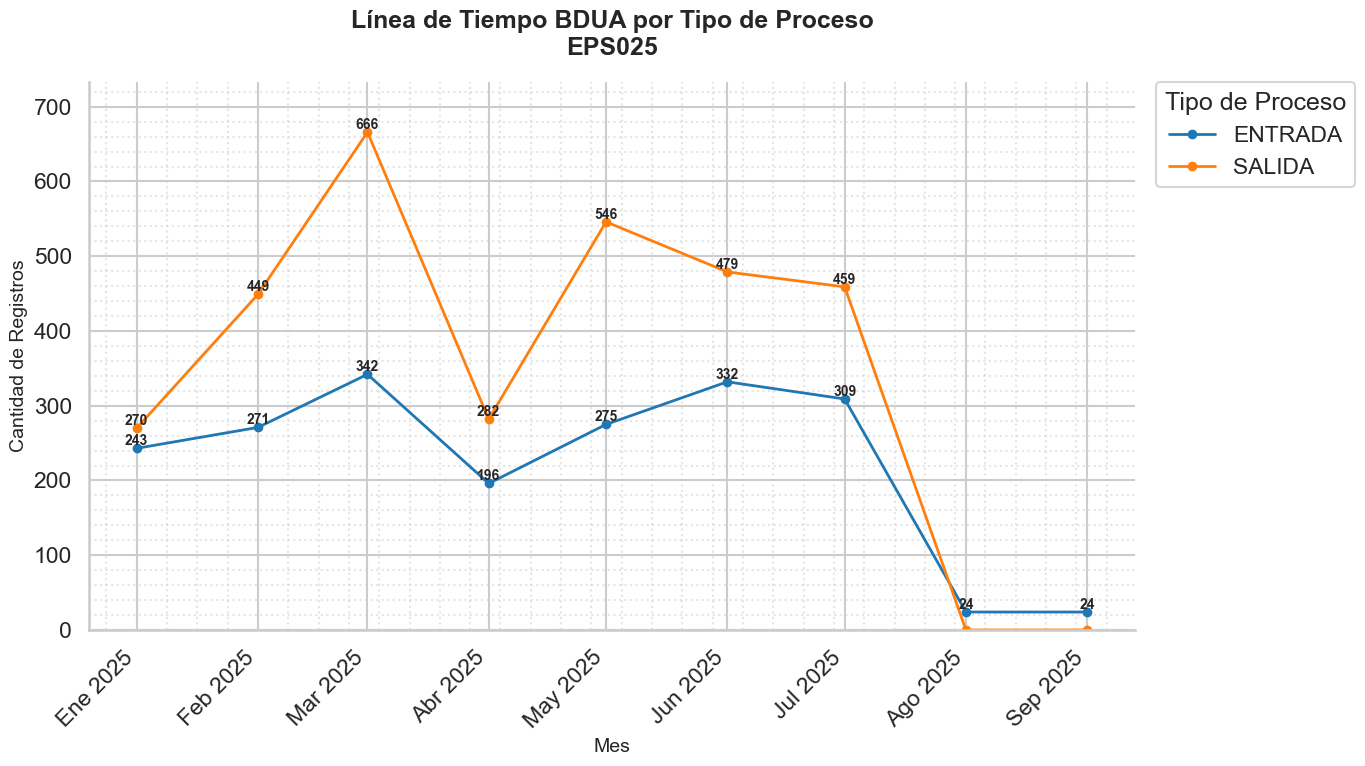


=== ESTADÍSTICAS DEL GRÁFICO ===
Valor máximo en el gráfico: 666
Mes con más registros: 2025-03
Registros en ese mes: 1008

=== TABLA RESUMEN POR MES ===
PROCESO  ENTRADA  SALIDA   Total
Mes_Año                         
2025-01    243.0   270.0   513.0
2025-02    271.0   449.0   720.0
2025-03    342.0   666.0  1008.0
2025-04    196.0   282.0   478.0
2025-05    275.0   546.0   821.0
2025-06    332.0   479.0   811.0
2025-07    309.0   459.0   768.0
2025-08     24.0     0.0    24.0
2025-09     24.0     0.0    24.0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# Asegurarse de que la columna FECHA_PROCESO esté en formato de fecha
df_Estadisticas['FECHA_PROCESO'] = pd.to_datetime(df_Estadisticas['FECHA_PROCESO'], errors='coerce')

# Crear una nueva columna para el mes y año
df_Estadisticas['Mes_Año'] = df_Estadisticas['FECHA_PROCESO'].dt.to_period('M')

# Agrupar por Mes_Año y PROCESO, y contar los registros
totales_por_mes = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().reset_index(name='Total')

# Pivotar los datos para que cada PROCESO sea una columna
timeline = totales_por_mes.pivot(index='Mes_Año', columns='PROCESO', values='Total').fillna(0)

# Mostrar información del timeline
print("=== INFORMACIÓN DEL TIMELINE ===")
print(f"Período de datos: {timeline.index.min()} a {timeline.index.max()}")
print(f"Tipos de proceso disponibles: {list(timeline.columns)}")
print(f"Total de meses: {len(timeline)}")

print("\nResumen por tipo de proceso:")
for proceso in timeline.columns:
    total = timeline[proceso].sum()
    print(f"  {proceso}: {int(total)} registros")

# Mapeo abreviado de meses en español
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

# Estilo y paleta
sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

# Índice de fechas (Timestamp)
idx = timeline.index.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 8))

# Colores específicos para ENTRADA y SALIDA (similares a los del SAT)
colores_proceso = {
    'ENTRADA': '#1f77b4',  # Azul
    'SALIDA': '#ff7f0e'    # Naranja
}

# Plotear cada línea
for column in timeline.columns:
    y = timeline[column].values
    color = colores_proceso.get(column, '#2ca02c')  # Verde por defecto para otros valores
    
    ax.plot(idx, y, marker='o', linewidth=2, label=column, color=color, markersize=6)
    
    # Etiqueta cada punto
    for x, val in zip(idx, y):
        if val > 0:  # Solo mostrar etiquetas para valores > 0
            ax.text(x, val, f"{int(val)}",
                    va='bottom', ha='center',
                    fontsize=10, fontweight='bold')

# Formato de eje X con etiquetas en español
ax.set_xticks(idx)
ax.set_xticklabels(
    [f"{spanish_abbr[d.month]} {d.year}" for d in idx],
    rotation=45,
    ha='right'
)

# Despine y grillas secundarias
sns.despine(ax=ax)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

# Títulos y ejes
ax.set_title(
    f'Línea de Tiempo BDUA por Tipo de Proceso\n{Regimen}',
    fontsize=18, fontweight='bold', pad=20
)
ax.set_xlabel('Mes', fontsize=14)
ax.set_ylabel('Cantidad de Registros', fontsize=14)

# Leyenda fuera del plot
ax.legend(
    title='Tipo de Proceso',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0.
)

# Ajustar el rango del eje Y para mejor visualización
y_max = timeline.values.max()
ax.set_ylim(0, y_max * 1.1)

plt.tight_layout()
plt.show()

# Información adicional
print(f"\n=== ESTADÍSTICAS DEL GRÁFICO ===")
print(f"Valor máximo en el gráfico: {int(y_max)}")
print(f"Mes con más registros: {timeline.sum(axis=1).idxmax()}")
print(f"Registros en ese mes: {int(timeline.sum(axis=1).max())}")

# Mostrar tabla resumen
print(f"\n=== TABLA RESUMEN POR MES ===")
resumen_tabla = timeline.copy()
resumen_tabla['Total'] = resumen_tabla.sum(axis=1)
print(resumen_tabla)

## 7.2. Gráfico de Barras Apiladas por Tipo de Archivo

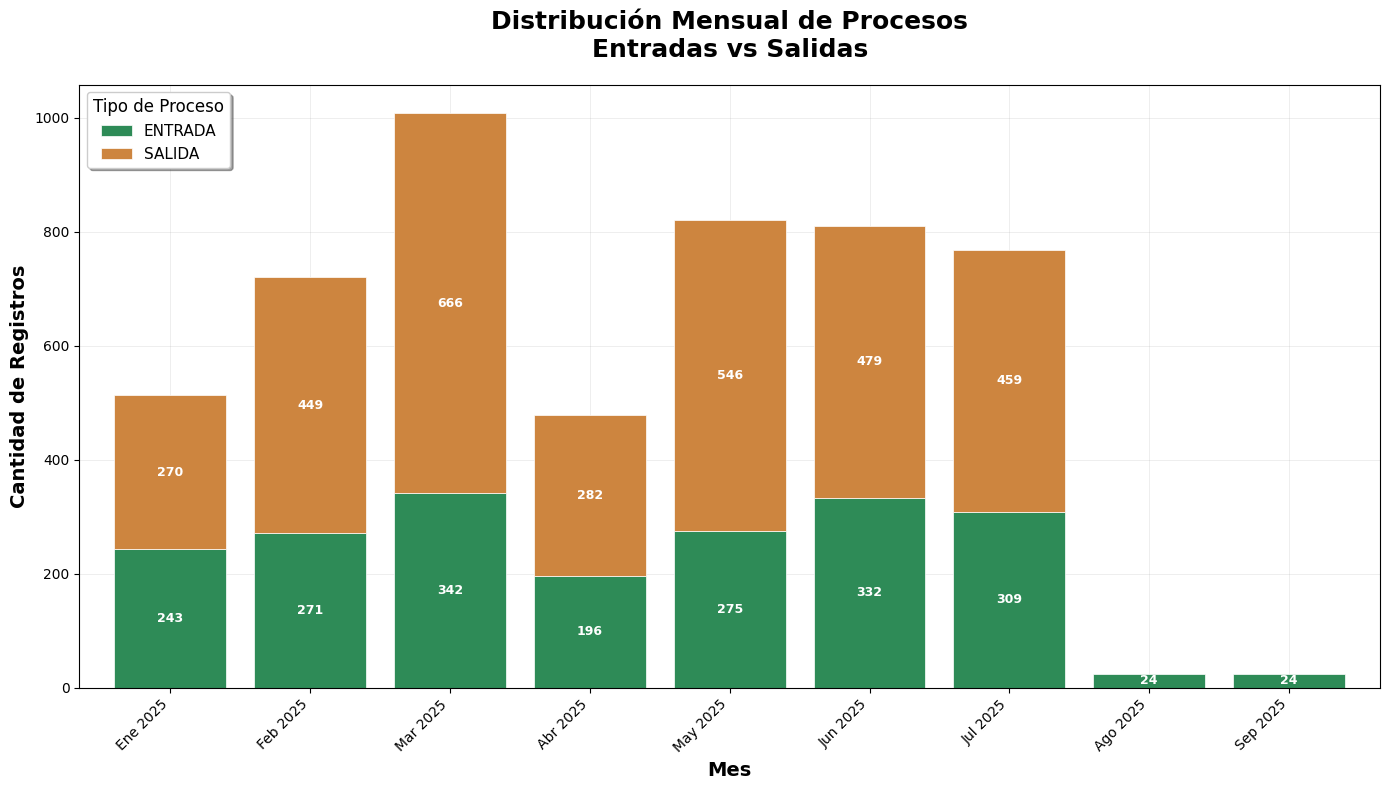

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear datos agrupados por mes (sin separar por tipo de archivo individual)
df_Estadisticas['Mes_Año'] = df_Estadisticas['FECHA_PROCESO'].dt.to_period('M')

# Agrupar por mes y proceso
timeline_proceso = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)

# Mapeo de meses en español
spanish_abbr = {1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'}

# Configurar el estilo
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))

# Crear el gráfico de barras apiladas
timeline_proceso.plot(kind='bar', stacked=True, ax=ax, 
                     color=['#2E8B57', '#CD853F'],  # Verde marino y marrón dorado
                     width=0.8, edgecolor='white', linewidth=0.5)

# Personalizar etiquetas del eje X
labels = [f"{spanish_abbr[period.month]} {period.year}" for period in timeline_proceso.index]
ax.set_xticklabels(labels, rotation=45, ha='right')

# Títulos y etiquetas
ax.set_title('Distribución Mensual de Procesos\nEntradas vs Salidas', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Mes', fontsize=14, fontweight='bold')
ax.set_ylabel('Cantidad de Registros', fontsize=14, fontweight='bold')

# Mejorar la leyenda
ax.legend(title='Tipo de Proceso', loc='upper left', frameon=True, 
          fancybox=True, shadow=True, title_fontsize=12, fontsize=11)

# Agregar valores en las barras
for i, (idx, row) in enumerate(timeline_proceso.iterrows()):
    entrada = row.get('ENTRADA', 0)
    salida = row.get('SALIDA', 0)
    
    if entrada > 0:
        ax.text(i, entrada/2, f'{int(entrada)}', ha='center', va='center', 
                fontweight='bold', color='white', fontsize=9)
    if salida > 0:
        ax.text(i, entrada + salida/2, f'{int(salida)}', ha='center', va='center', 
                fontweight='bold', color='white', fontsize=9)

# Mejorar el grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## 7.3. Heatmap de Tipos de Archivo por Mes registros de SALIDA

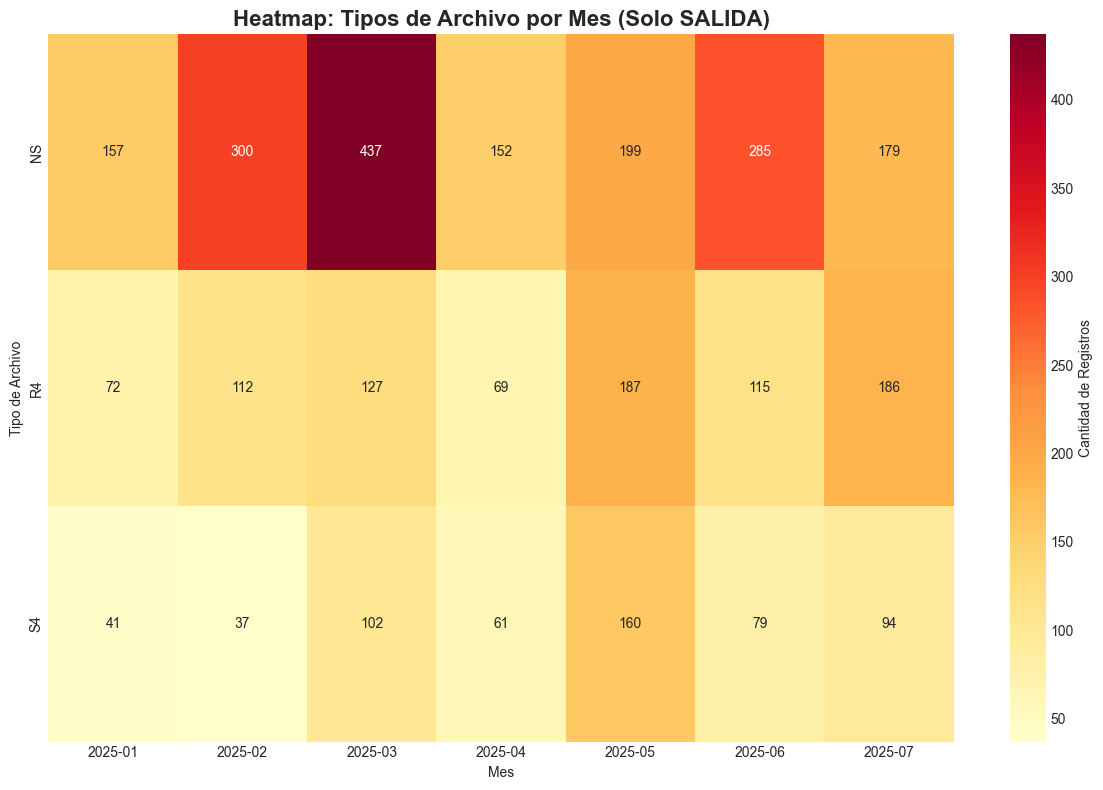

In [43]:
# Filtrar solo los registros de SALIDA
df_salida = df_Estadisticas[df_Estadisticas['PROCESO'] == 'SALIDA']

# Heatmap mostrando la intensidad de cada tipo de archivo por mes (solo SALIDA)
pivot_heatmap_salida = df_salida.groupby(['Mes_Año', 'Tipo_Archivo']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_heatmap_salida.T, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Cantidad de Registros'})
plt.title('Heatmap: Tipos de Archivo por Mes (Solo SALIDA)', fontsize=16, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Tipo de Archivo')
plt.tight_layout()
plt.show()

## 7.4. Heatmap de Tipos de Archivo por Mes registros de ENTRADA

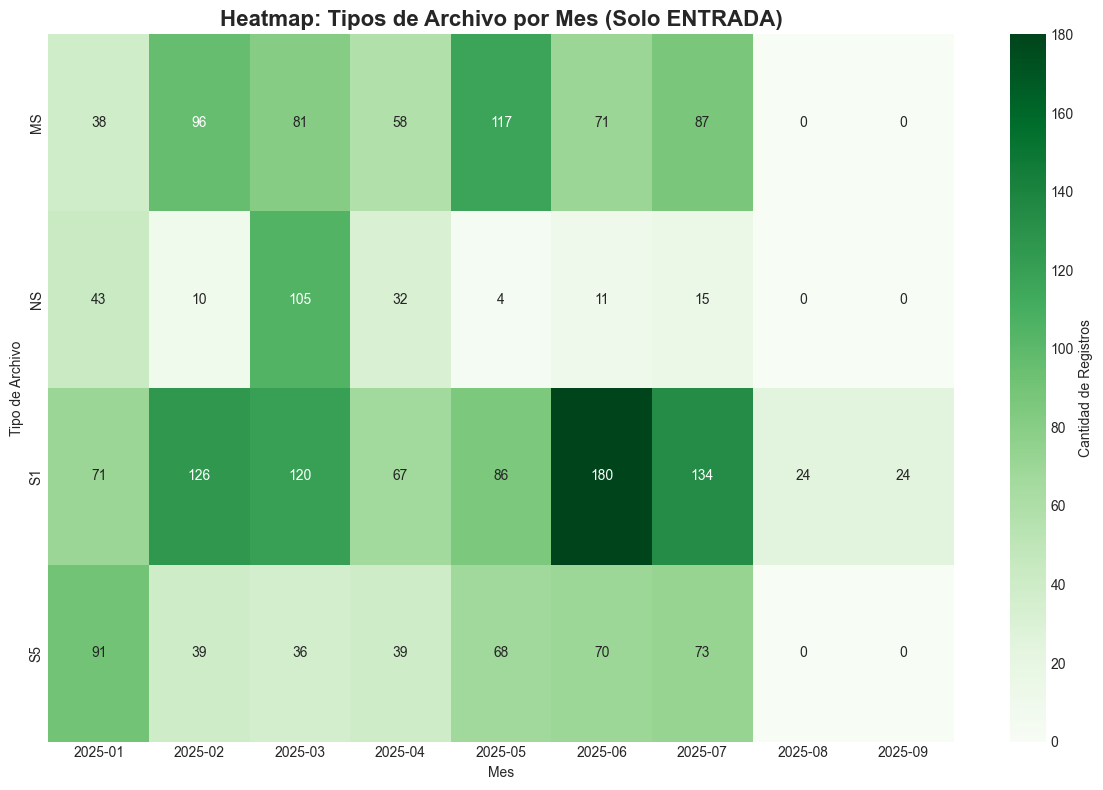

In [45]:
# Filtrar solo los registros de ENTRADA
df_entrada = df_Estadisticas[df_Estadisticas['PROCESO'] == 'ENTRADA']

# Heatmap mostrando la intensidad de cada tipo de archivo por mes (solo ENTRADA)
pivot_heatmap_entrada = df_entrada.groupby(['Mes_Año', 'Tipo_Archivo']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_heatmap_entrada.T, annot=True, fmt='d', cmap='Greens', 
            cbar_kws={'label': 'Cantidad de Registros'})
plt.title('Heatmap: Tipos de Archivo por Mes (Solo ENTRADA)', fontsize=16, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Tipo de Archivo')
plt.tight_layout()
plt.show()

## 7.5. Gráfico de Líneas Múltiples por Tipo de Archivo

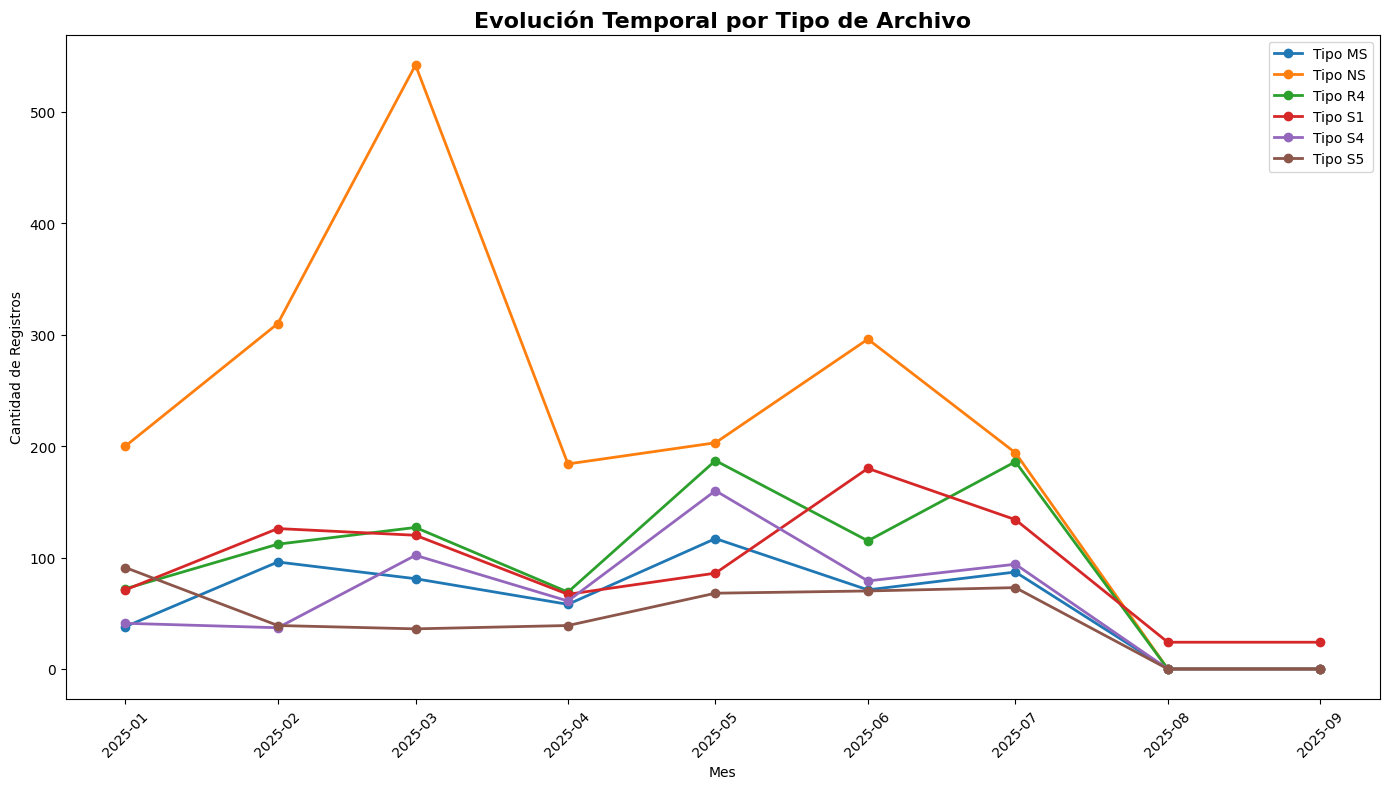

In [38]:
# Similar al que ya tienes pero separado por tipo de archivo
timeline_tipo = df_Estadisticas.groupby(['Mes_Año', 'Tipo_Archivo']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 8))
idx = timeline_tipo.index.to_timestamp()

for tipo in timeline_tipo.columns:
    y = timeline_tipo[tipo].values
    ax.plot(idx, y, marker='o', linewidth=2, label=f'Tipo {tipo}')

ax.set_title('Evolución Temporal por Tipo de Archivo', fontsize=16, fontweight='bold')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Registros')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7.6. Dashboard de Distribuciones

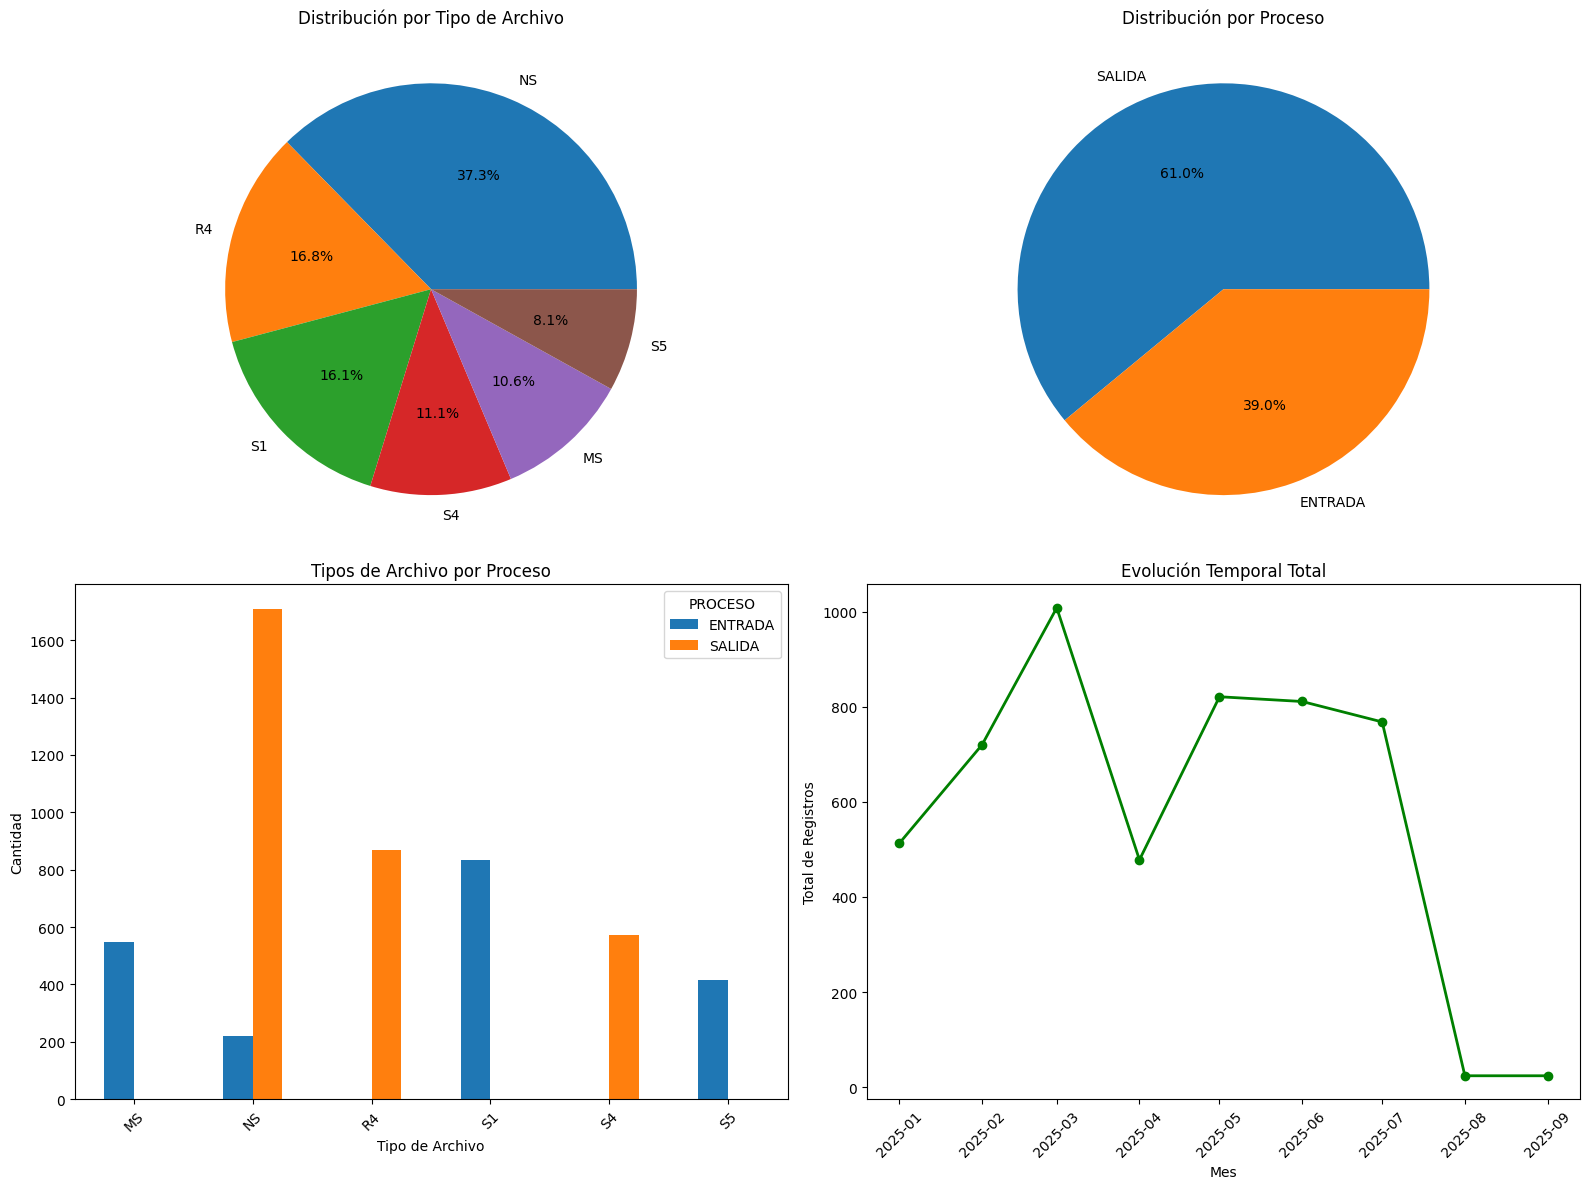

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribución por tipo de archivo
tipo_counts = df_Estadisticas['Tipo_Archivo'].value_counts()
ax1.pie(tipo_counts.values, labels=tipo_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribución por Tipo de Archivo')

# 2. Distribución por proceso
proceso_counts = df_Estadisticas['PROCESO'].value_counts()
ax2.pie(proceso_counts.values, labels=proceso_counts.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
ax2.set_title('Distribución por Proceso')

# 3. Barras por tipo de archivo y proceso
tabla_cruzada = pd.crosstab(df_Estadisticas['Tipo_Archivo'], df_Estadisticas['PROCESO'])
tabla_cruzada.plot(kind='bar', ax=ax3, color=['#1f77b4', '#ff7f0e'])
ax3.set_title('Tipos de Archivo por Proceso')
ax3.set_xlabel('Tipo de Archivo')
ax3.set_ylabel('Cantidad')
ax3.tick_params(axis='x', rotation=45)

# 4. Evolución temporal general
timeline_general = df_Estadisticas.groupby('Mes_Año').size()
idx = timeline_general.index.to_timestamp()
ax4.plot(idx, timeline_general.values, marker='o', linewidth=2, color='green')
ax4.set_title('Evolución Temporal Total')
ax4.set_xlabel('Mes')
ax4.set_ylabel('Total de Registros')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7.7. Facet Grid por Tipo de Archivo

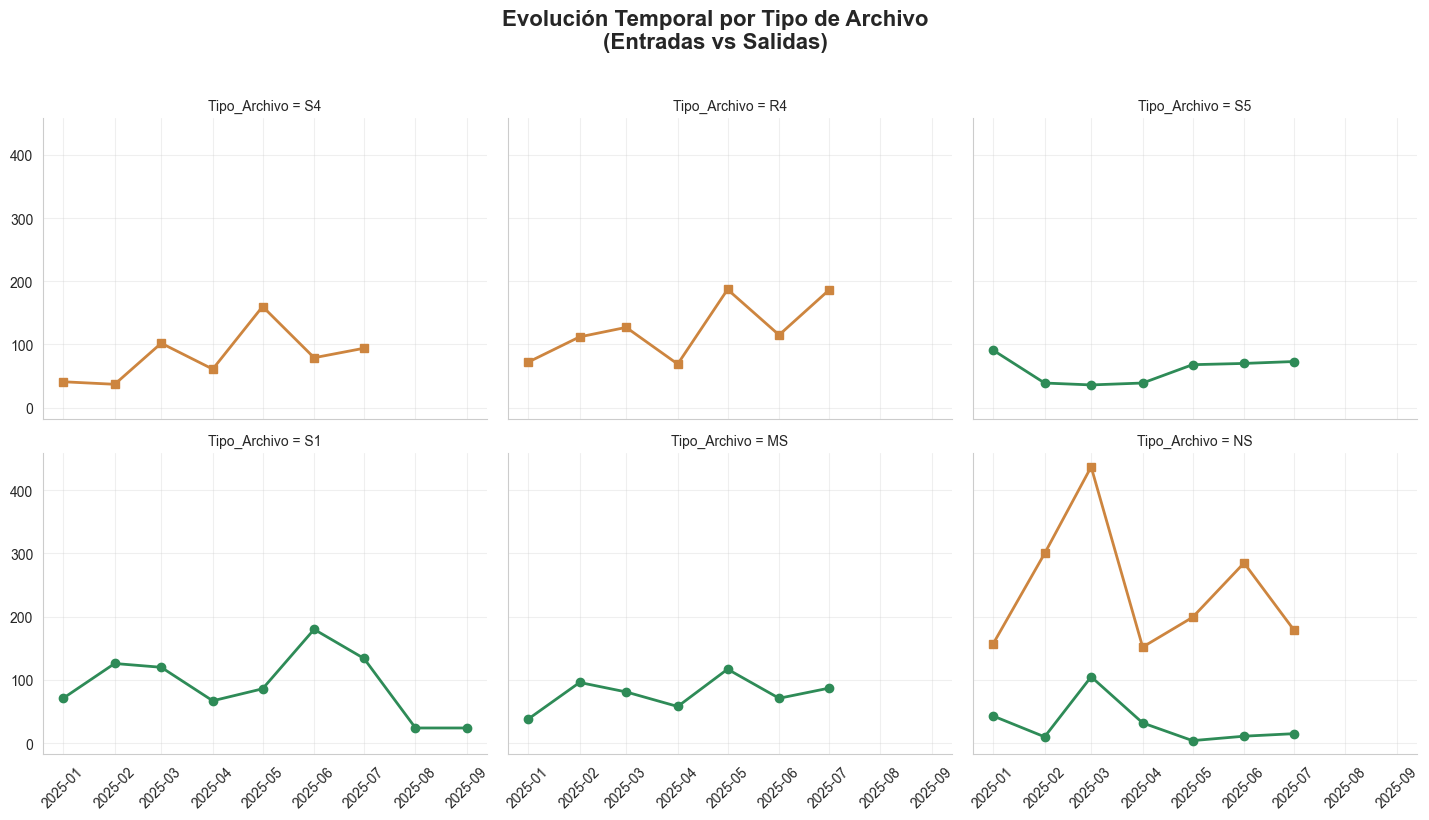

In [40]:
# Crear un subset con los tipos de archivo más relevantes
tipos_principales = df_Estadisticas['Tipo_Archivo'].value_counts().head(6).index.tolist()
df_subset = df_Estadisticas[df_Estadisticas['Tipo_Archivo'].isin(tipos_principales)].copy()

# Configurar el estilo
sns.set_style("whitegrid")
sns.set_palette("husl")

# Crear el facet grid
g = sns.FacetGrid(df_subset, col='Tipo_Archivo', col_wrap=3, height=4, aspect=1.2)

def plot_timeline(data, **kwargs):
    # Agrupar por mes y proceso
    timeline = data.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)
    
    if len(timeline) > 0:
        # Crear índice de fechas
        idx = timeline.index.to_timestamp()
        
        # Plotear líneas
        if 'ENTRADA' in timeline.columns:
            plt.plot(idx, timeline['ENTRADA'], marker='o', linewidth=2, 
                    label='ENTRADA', color='#2E8B57')
        if 'SALIDA' in timeline.columns:
            plt.plot(idx, timeline['SALIDA'], marker='s', linewidth=2, 
                    label='SALIDA', color='#CD853F')
        
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True, alpha=0.3)

g.map_dataframe(plot_timeline)
g.fig.suptitle('Evolución Temporal por Tipo de Archivo\n(Entradas vs Salidas)', 
               fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

## 7.8. Dashboard Compacto y Elegante

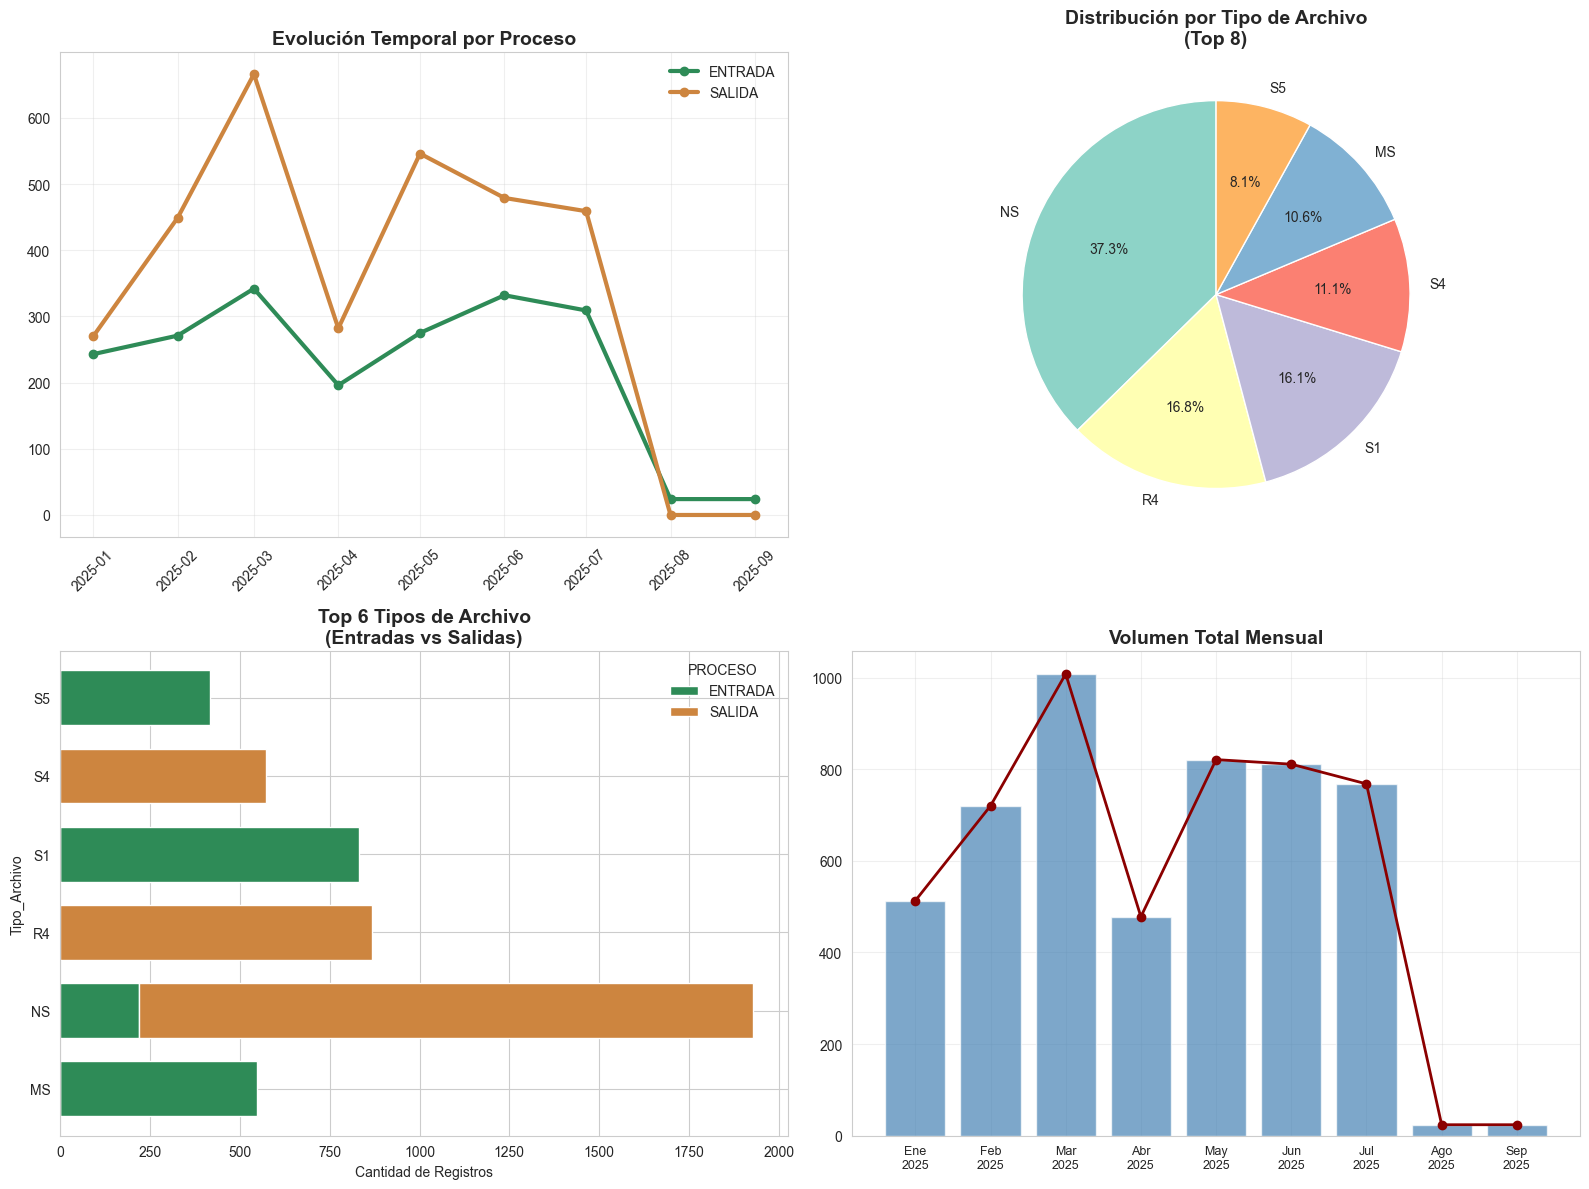

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Evolución temporal simplificada (solo totales por proceso)
timeline_simple = df_Estadisticas.groupby(['Mes_Año', 'PROCESO']).size().unstack(fill_value=0)
idx = timeline_simple.index.to_timestamp()

for proceso in timeline_simple.columns:
    color = '#2E8B57' if proceso == 'ENTRADA' else '#CD853F'
    ax1.plot(idx, timeline_simple[proceso], marker='o', linewidth=3, 
             label=proceso, color=color, markersize=6)

ax1.set_title('Evolución Temporal por Proceso', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Distribución por tipo de archivo (top 8)
top_tipos = df_Estadisticas['Tipo_Archivo'].value_counts().head(8)
colors = plt.cm.Set3(range(len(top_tipos)))
wedges, texts, autotexts = ax2.pie(top_tipos.values, labels=top_tipos.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Distribución por Tipo de Archivo\n(Top 8)', fontsize=14, fontweight='bold')

# 3. Barras horizontales por tipo y proceso (top 6 tipos)
top_6_tipos = df_Estadisticas['Tipo_Archivo'].value_counts().head(6).index
df_top6 = df_Estadisticas[df_Estadisticas['Tipo_Archivo'].isin(top_6_tipos)]
tabla_cruzada = pd.crosstab(df_top6['Tipo_Archivo'], df_top6['PROCESO'])

tabla_cruzada.plot(kind='barh', ax=ax3, color=['#2E8B57', '#CD853F'], 
                   stacked=True, width=0.7)
ax3.set_title('Top 6 Tipos de Archivo\n(Entradas vs Salidas)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Cantidad de Registros')

# 4. Tendencia general mensual
totales_mes = df_Estadisticas.groupby('Mes_Año').size()
idx = totales_mes.index.to_timestamp()
ax4.bar(range(len(idx)), totales_mes.values, color='steelblue', alpha=0.7)
ax4.plot(range(len(idx)), totales_mes.values, color='darkred', linewidth=2, marker='o')

# Personalizar eje X del último gráfico
labels = [f"{spanish_abbr[period.month]}\n{period.year}" for period in totales_mes.index]
ax4.set_xticks(range(len(idx)))
ax4.set_xticklabels(labels, fontsize=9)
ax4.set_title('Volumen Total Mensual', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. Salida dataframe

In [48]:
df_Estadisticas.to_csv(R_Salida, index=False, encoding='ansi', sep=',')